<a href="https://colab.research.google.com/github/DataDrivenAkanksha/Cryptocurrency_price_forecasting/blob/main/Cryptocurrency_daily_price_forecasting_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cryptocurrencies are fast becoming rivals to traditional currency across the world. The digital currencies are available to purchase in many different places, making it accessible to everyone, and with retailers accepting various cryptocurrencies it could be a sign that money as we know it is about to go through a major change.

In addition, the blockchain technology on which many cryptocurrencies are based, with its revolutionary distributed digital backbone, has many other promising applications. Implementations of secure, decentralized systems can aid us in conquering organizational issues of trust and security that have plagued our society throughout the ages. In effect, we can fundamentally disrupt industries core to economies, businesses and social structures, eliminating inefficiency and human error.

Content
The dataset contains all historical daily prices (open, high, low, close) for all cryptocurrencies listed on CoinMarketCap.

# Connecting with the kaggle and importing the data

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Loading the data from kaggle
!kaggle datasets download -d taniaj/cryptocurrency-market-history-coinmarketcap

Dataset URL: https://www.kaggle.com/datasets/taniaj/cryptocurrency-market-history-coinmarketcap
License(s): CC0-1.0
  0% 0.00/13.4M [00:00<?, ?B/s]
100% 13.4M/13.4M [00:00<00:00, 932MB/s]


In [3]:
# unzipping the data
!unzip cryptocurrency-market-history-coinmarketcap.zip

Archive:  cryptocurrency-market-history-coinmarketcap.zip
  inflating: all_currencies.csv      


In [4]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('all_currencies.csv')

In [6]:
df.head(5)

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.head(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [9]:
df.tail(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
632213,2018-09-23,ZZC,0.067149,0.067324,0.024069,0.024161,34.0,130705.0
632214,2018-09-24,ZZC,0.024167,0.091875,0.024121,0.091631,58.0,47041.0
632215,2018-09-25,ZZC,0.091528,0.091568,0.057507,0.090547,752.0,178158.0
632216,2018-09-26,ZZC,0.090400,0.104745,0.086071,0.086559,60.0,175963.0
632217,2018-09-27,ZZC,0.086664,0.130541,0.067363,0.073475,91.0,168691.0


In [10]:
df.sample(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
159782,2018-06-18,DEV,2.750000,2.760000,2.380000,2.650000,2162.0,6697701.0
256469,2017-06-05,GRS,0.059424,0.125923,0.054406,0.068526,321913.0,4019340.0
571089,2017-11-24,WDC,0.015011,0.018482,0.013223,0.017367,15268.0,1760258.0
134667,2016-04-23,CNO,0.000009,0.000014,0.000009,0.000014,0.0,NaN
580196,2018-01-06,XCO,0.032471,0.036421,0.029441,0.036394,14863.0,402151.0


In [11]:
df['Symbol'].value_counts()

,count
Symbol,
BTC,1979
NMC,1979
LTC,1979
NVC,1978
PPC,1978
...,...
MNP,2
PHON,2
DACH,2


In [12]:
df.shape

(632218, 8)

In [13]:
df.isna().sum()

,0
Date,0
Symbol,0
Open,0
High,0
Low,0
Close,0
Volume,5335
Market Cap,64377


In [14]:
#removing null value
df.dropna(inplace=True)

In [15]:
# checking duplicates
df.duplicated().sum()

np.int64(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562506 entries, 29 to 632217
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        562506 non-null  object 
 1   Symbol      562506 non-null  object 
 2   Open        562506 non-null  float64
 3   High        562506 non-null  float64
 4   Low         562506 non-null  float64
 5   Close       562506 non-null  float64
 6   Volume      562506 non-null  float64
 7   Market Cap  562506 non-null  float64
dtypes: float64(6), object(2)
memory usage: 38.6+ MB


In [17]:
#setting date column to date time
df.Date = pd.to_datetime(df.Date)

In [18]:
# setting date column as index
df = df.set_index('Date')
df.sample(5)

,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2014-10-09,XMR,1.090000,1.160000,1.050000,1.110000,66785.0,4255220.0
2018-09-06,GBYTE,62.150000,66.900000,58.320000,61.200000,52141.0,41194132.0
2016-05-09,XWC,0.000330,0.000333,0.000329,0.000332,43.0,101220.0
2016-06-26,NLX,0.000160,0.000160,0.000082,0.000113,1499.0,5441.0
2018-08-15,DOPE,0.010599,0.012419,0.010453,0.011628,6719.0,1238389.0


In [19]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,5.625060e+05,5.625060e+05,5.625060e+05,5.625060e+05,5.625060e+05,5.625060e+05
mean,1.748373e+02,2.069828e+02,1.438328e+02,1.726718e+02,1.044673e+07,2.494647e+08
std,8.294175e+03,1.084154e+04,6.151075e+03,8.156668e+03,2.192210e+08,4.474738e+09
min,7.100000e-09,7.600000e-09,3.000000e-09,7.100000e-09,0.000000e+00,0.000000e+00
25%,8.720000e-04,1.006000e-03,7.620000e-04,8.730000e-04,6.000000e+01,3.754600e+04
50%,1.013750e-02,1.155400e-02,8.934000e-03,1.012500e-02,7.590000e+02,2.520820e+05
75%,1.183028e-01,1.330790e-01,1.061602e-01,1.182267e-01,1.550800e+04,2.444712e+06
max,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261413e+11


#Data Visulaization

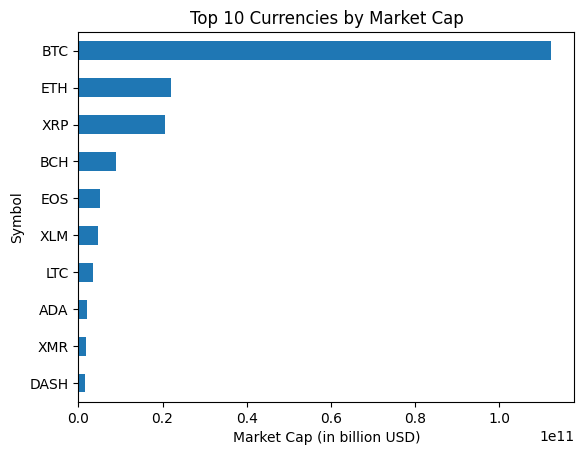

In [20]:
# Plotting top 10 verical bar plot
ax = df.groupby(['Symbol'])['Market Cap'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Market cap (in billion USD)");
plt.title("Top 10 Currencies by Market Cap");
plt.ylabel('Symbol')
plt.xlabel('Market Cap (in billion USD)')
plt.show()

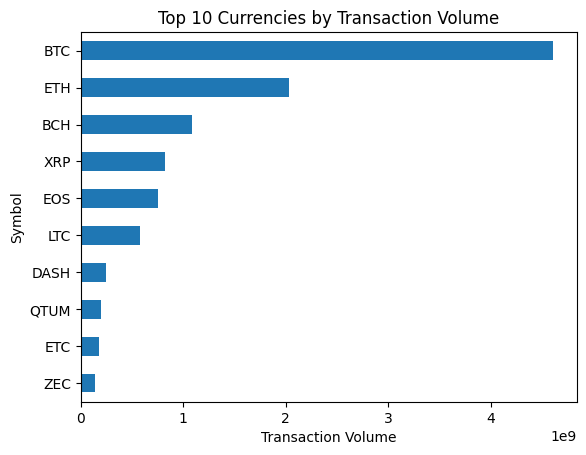

In [21]:
# Plotting top 10 verical bar plot
ax = df.groupby(['Symbol'])['Volume'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Transaction Volume");
plt.title("Top 10 Currencies by Transaction Volume");
plt.ylabel('Symbol')
plt.show()

In [22]:
# the top5 currency by market cap data
top_5_currency_names = df.groupby(['Symbol'])['Market Cap'].last().sort_values(ascending=False).head(5).index
top_5_currency_data = df[df['Symbol'].isin(top_5_currency_names)]
top_5_currency_data.head(5)




,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2017-08-02,BCH,382.38,756.93,309.33,452.66,416207008.0,6.302362e+09
2017-08-03,BCH,448.49,519.28,364.05,364.05,161518000.0,7.392028e+09
2017-08-04,BCH,362.18,386.93,233.05,233.05,185038000.0,5.969723e+09
2017-08-05,BCH,231.11,273.04,200.98,213.15,144043008.0,3.809333e+09
2017-08-06,BCH,212.18,223.70,203.45,220.66,107606000.0,3.497291e+09


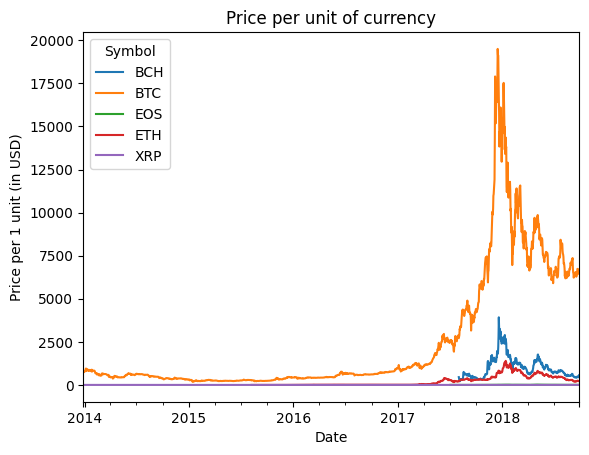

In [23]:
# Price per unit of top 5 currency
ax = top_5_currency_data.groupby(['Date', 'Symbol'])['Close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

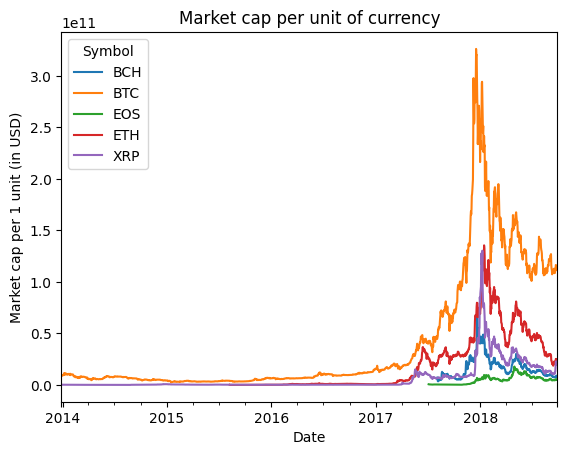

In [24]:
# Market cap per unit of top 5 currency
ax = top_5_currency_data.groupby(['Date', 'Symbol'])['Market Cap'].mean().unstack().plot();
ax.set_ylabel("Market cap per 1 unit (in USD)");
plt.title("Market cap per unit of currency");

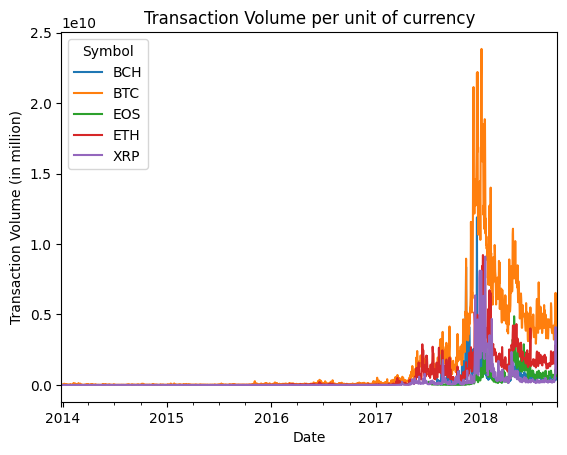

In [25]:
# Transaction volume per unit of top 5 currency
ax = top_5_currency_data.groupby(['Date', 'Symbol'])['Volume'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per unit of currency");

#Extracting the bitcoin data only

In [26]:
btc_df = df[df['Symbol'] == 'BTC']

In [27]:
btc_df.sample(5)

,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2015-09-21,BTC,231.22,231.22,226.52,227.09,19678800.0,3.383840e+09
2014-12-15,BTC,351.36,351.82,344.93,345.35,17264200.0,4.781560e+09
2015-07-13,BTC,310.83,310.95,281.01,292.05,62053900.0,4.468540e+09
2014-08-25,BTC,508.22,508.22,499.23,502.50,18356700.0,6.700090e+09
2017-04-08,BTC,1172.65,1184.98,1162.58,1175.95,209312000.0,1.906860e+10


In [28]:
btc_df.columns

Index(['Symbol', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [29]:
btc_df.shape

(1736, 7)

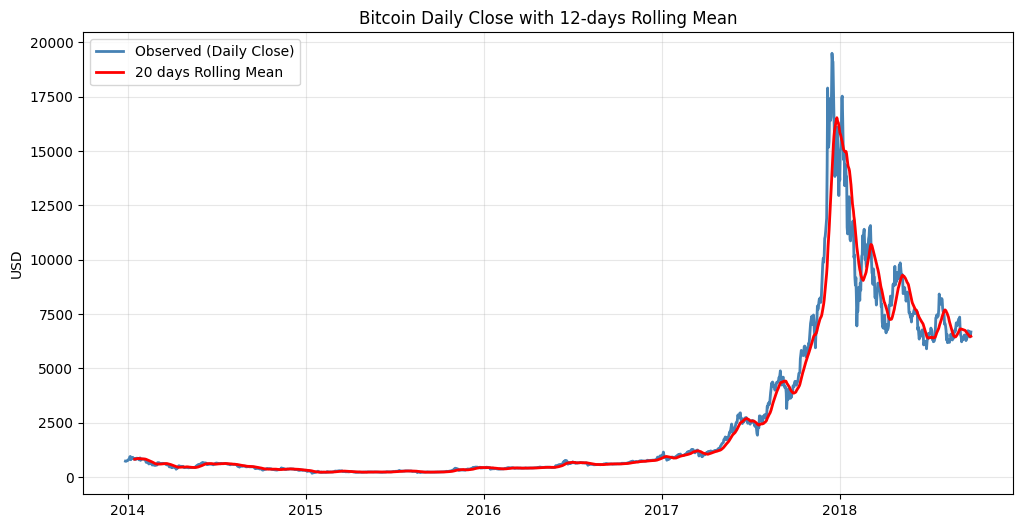

In [30]:
import matplotlib.pyplot as plt

# Compute rolling mean (for example, a 20 days moving average)
btc_df['rolling_mean_20'] = btc_df['Close'].rolling(window=20).mean()

# Plot original data and rolling mean
plt.figure(figsize=(12,6))
plt.plot(btc_df['Close'], label='Observed (Daily Close)', color='steelblue', linewidth=2)
plt.plot(btc_df['rolling_mean_20'], label='20 days Rolling Mean', color='red', linewidth=2)
plt.fill_between(btc_df.index,
                 btc_df['rolling_mean_20'],
                 btc_df['Close'],
                 color='gray', alpha=0.1)
plt.title('Bitcoin Daily Close with 12-days Rolling Mean')
plt.ylabel('USD')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


<Axes: title={'center': 'BTC Price chart'}, xlabel='Date'>

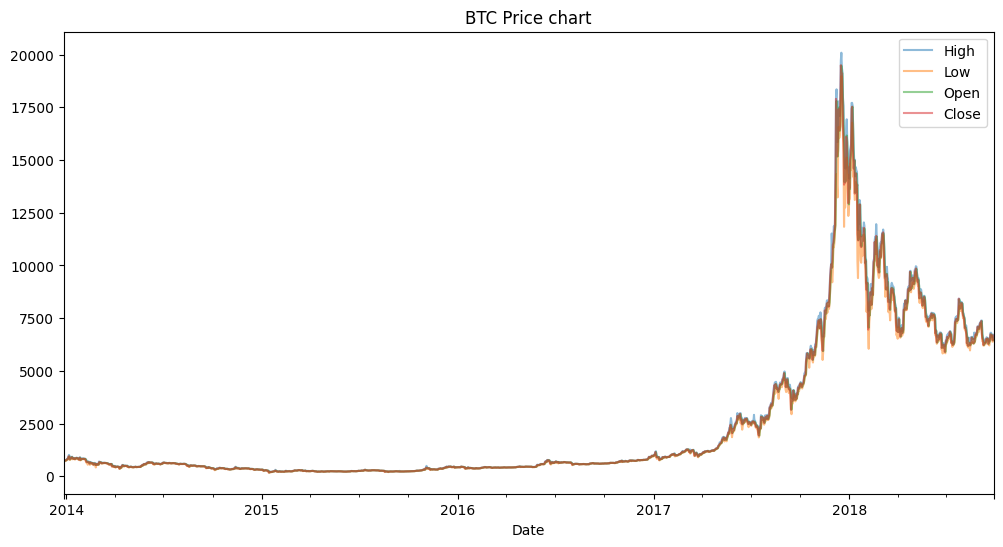

In [31]:
btc_df[['High','Low','Open','Close']].plot(figsize=(12,6),alpha=0.5,title='BTC Price chart')

#alpha controls the transparency of the lines in the plot. It ranges from:
# 0.0 → completely transparent (invisible)
# 1.0 → completely opaque (default)
# Each of the lines (High, Low, Open, Close) will be drawn at 50% transparency. This is useful when plotting multiple overlapping lines, so you can still see everything clearly
# and the plot doesn’t look cluttered.

The four had almost same behaviour throught time and nased on this assumption in this project we will only focus on one of them in order to build a model which could predict fututre values and then as possible suggestions extrapolate such model to other indicators. First we check the stationary and seasonality in the data.

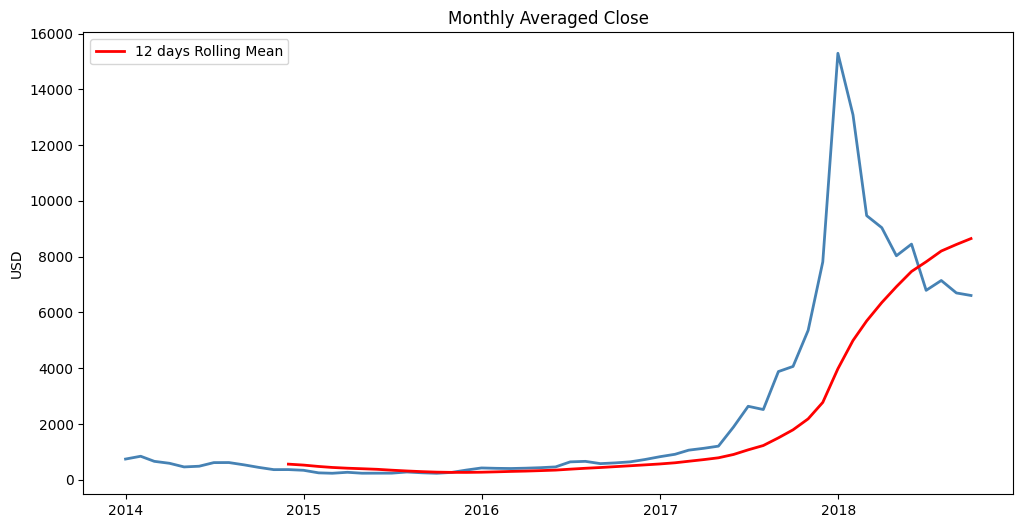

In [32]:
#Monthly Averaged Close : to check long term patterns
btc_month = pd.DataFrame()
btc_month['Close'] = btc_df['Close'].resample('M').mean()
btc_month['rolling_mean_12'] = btc_month['Close'].rolling(window=12).mean()
plt.figure(figsize=(12,6))
plt.plot(btc_month['Close'], color='steelblue', linewidth=2)
plt.plot(btc_month['rolling_mean_12'], label='12 days Rolling Mean', color='red', linewidth=2)
plt.ylabel('USD')
plt.title('Monthly Averaged Close')
plt.legend()
plt.show()

Daily return distribution

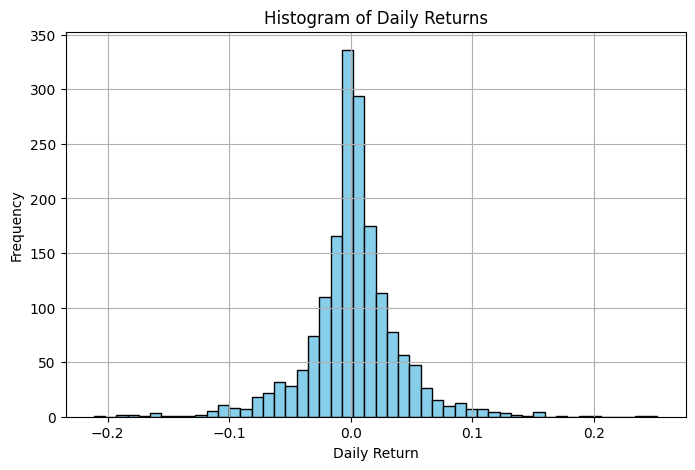

In [33]:
#Understanding return volatality
returns = btc_df['Close'].pct_change().dropna()

plt.figure(figsize=(8,5))
returns.hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


Log Price Transformation

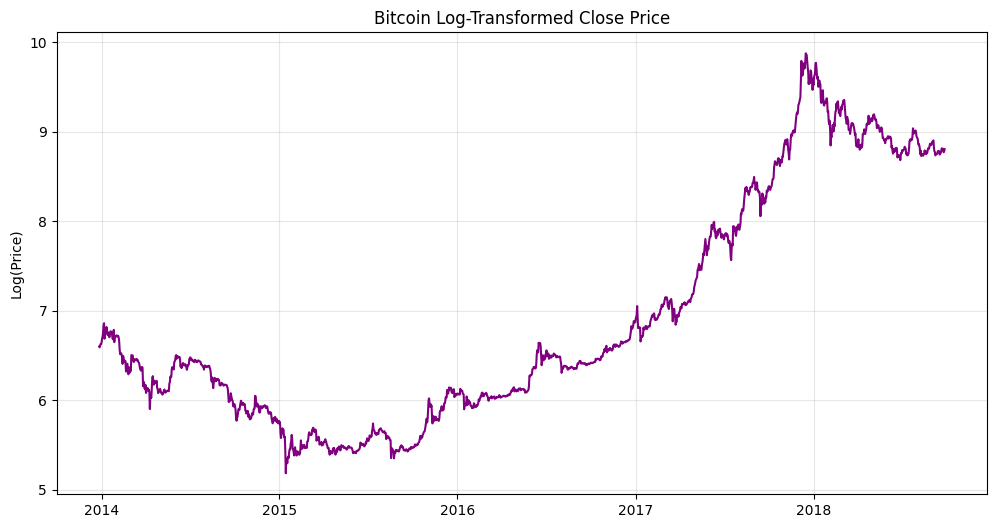

In [34]:
btc_df['Close_log'] = np.log(btc_df['Close'])
plt.figure(figsize=(12,6))
plt.plot(btc_df['Close_log'], color='purple')
plt.title('Bitcoin Log-Transformed Close Price')
plt.ylabel('Log(Price)')
plt.grid(alpha=0.3)
plt.show()

#Stationary check and seasonal decomposition


If a timeseries is a stationary then it implies mean and variance are constant in time. This is a important step in timeseries analysis.
Seasonal decomposition is a method in statsmodel to decompose time series in the 4 components such as stationary, Trend, seasonal and residual.

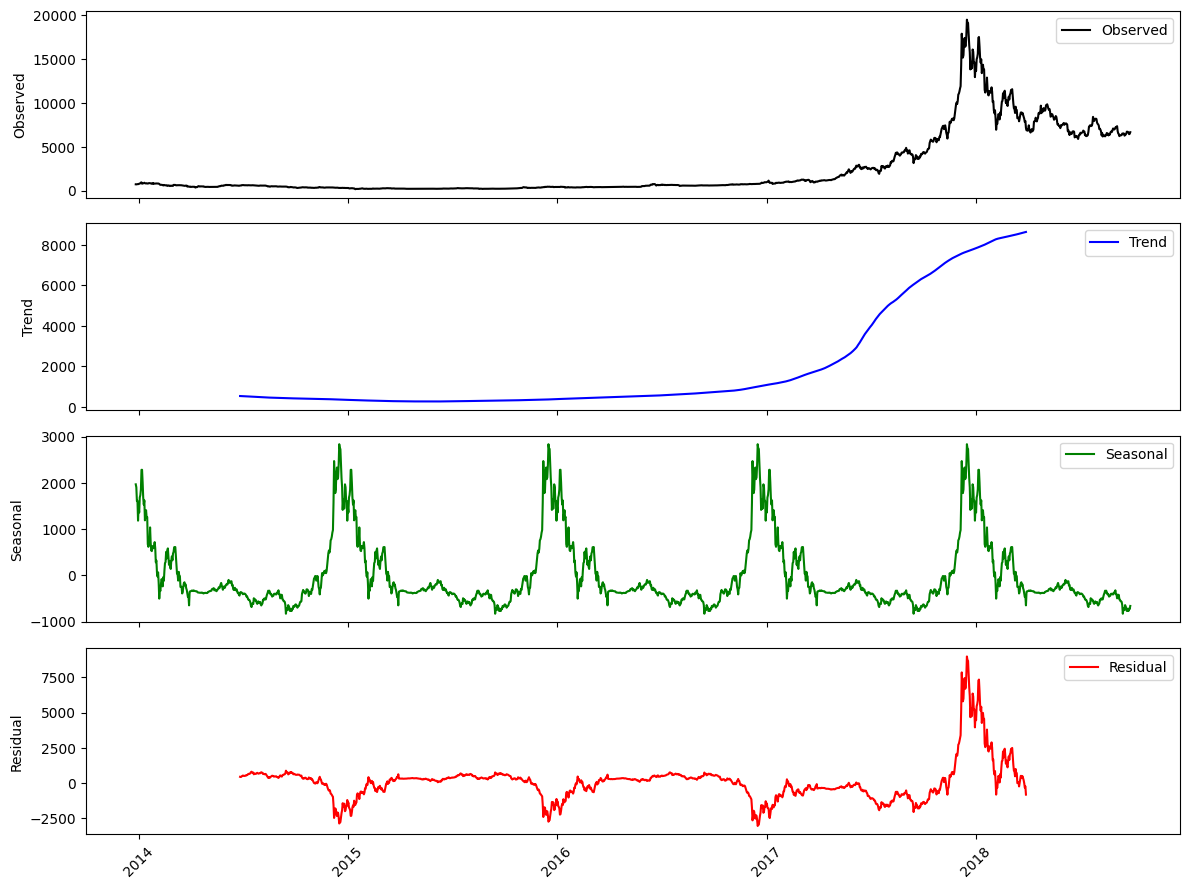

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensure DataFrame is sorted by date
btc_df = btc_df.sort_index()

# Use daily Close prices
daily_close = btc_df['Close'].dropna()

# Perform seasonal decomposition
# For daily data with weekly seasonality, period=7; for yearly, period=365
#This tells the function how the components combine: Observed=Trend+Seasonal+Residual
result = seasonal_decompose(daily_close, model='additive', period=365)

# Plot full decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)

axes[0].plot(daily_close, label='Observed', color='black')
axes[0].set_ylabel('Observed')
axes[0].legend()

axes[1].plot(result.trend, label='Trend', color='blue')
axes[1].set_ylabel('Trend')
axes[1].legend()

axes[2].plot(result.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

axes[3].plot(result.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The seasonal commponent repeat after each year on a yearly basis. "There’s a repeating seasonal pattern every 12 periods.”

In [36]:
from statsmodels.tsa.stattools import adfuller


# Run ADF test on 'Close' prices
result = adfuller(daily_close)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -1.7004292124761495
p-value: 0.43089134726645195
Critical Values:
   1%: -3.434175427574795
   5%: -2.8632297119111967
   10%: -2.567669556525133


| Output              | Interpretation                                                                                                                                |
| ------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **ADF Statistic**   | The test statistic. Should be **less than** the critical value to reject the null hypothesis (i.e., detect stationarity).                     |
| **p-value**         | If **< 0.05**, the series is likely **stationary** (no unit root).                                                                            |
| **Critical Values** | Benchmarks at 1%, 5%, and 10% confidence levels. If ADF stat is **less than** these values, the null hypothesis (non-stationary) is rejected. |


📉 Interpretation
❌ The series is not stationary.

Why?

p-value = 0.43 → much higher than 0.05 → fail to reject the null hypothesis (that the series has a unit root).

ADF Statistic = -1.7, which is greater than all the critical values (1%, 5%, 10%).

So the test suggests  BTC Close prices are non-stationary — which is very common for financial time series (they usually have trends or seasonality).

#Autocorrelation factor(ACF) and partial autocorrelation factor(PACF)

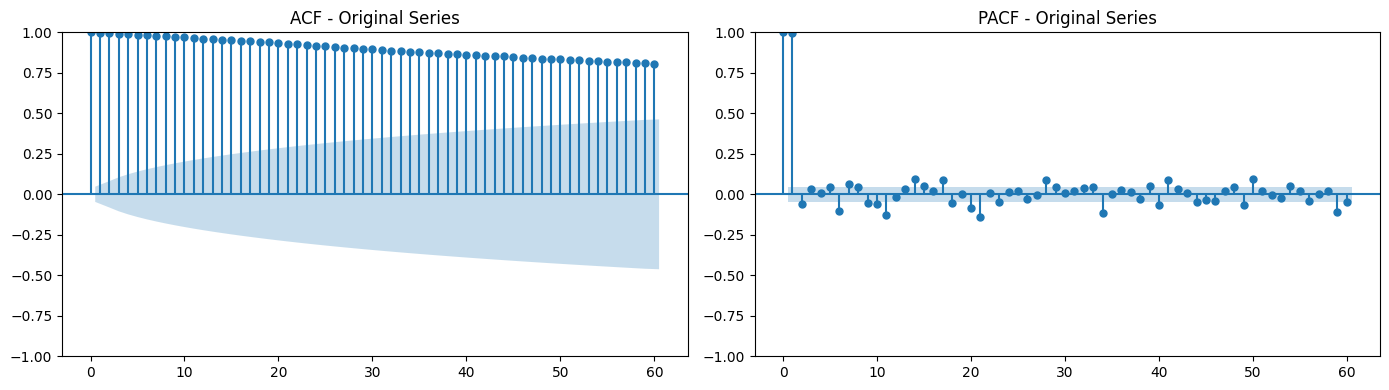

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Close (monthly resampled)
daily_close = btc_df['Close'].dropna()

# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF plot
plot_acf(daily_close, lags=60, ax=axes[0])
axes[0].set_title('ACF - Original Series')

# PACF plot
plot_pacf(daily_close, lags=60, ax=axes[1], method='ywm')
axes[1].set_title('PACF - Original Series')

plt.tight_layout()
plt.show()





The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are essential tools for identifying ARIMA model parameters (p and q) and checking for autocorrelation in time series.
----
| Plot                                        | Meaning                                                                                             | Helps Identify   |
| ------------------------------------------- | --------------------------------------------------------------------------------------------------- | ---------------- |
| **ACF (Autocorrelation Function)**          | Shows correlation between a series and its lagged values (e.g., value vs. value one month ago)      | **MA (q)** terms |
| **PACF (Partial Autocorrelation Function)** | Shows correlation between a series and its lagged values *after removing* intermediate correlations | **AR (p)** terms |

-----
If ACF decays slowly → series is non-stationary → need differencing (d > 0).

If ACF cuts off after lag q → indicates an MA(q) process.

If PACF cuts off after lag p → indicates an AR(p) process.

If both die off quickly → series is likely white noise.

Each plot has:

Blue shaded area = 95% confidence interval

Vertical bars = correlation strength at each lag

➡️ If a bar extends beyond the blue area → significant autocorrelation (not random noise).



| Pattern in ACF / PACF                                | Interpretation                      | Possible Model                  |
| ---------------------------------------------------- | ----------------------------------- | ------------------------------- |
| **Slow decay in ACF**                                | Non-stationary (trend not removed)  | Apply differencing (`d=1`)      |
| **ACF cuts off after lag *q*** and PACF tails off    | MA(q) process                       | Moving Average model            |
| **PACF cuts off after lag *p*** and ACF tails off    | AR(p) process                       | Autoregressive model            |
| **Both decay quickly (within bounds)**               | White noise (no autocorrelation)    | No AR or MA terms needed        |
| **Repeating spikes at seasonal lags (12, 24, etc.)** | Seasonality (annual, monthly, etc.) | Add seasonal terms (P, D, Q, m) |



# Treating the non stationary : Applying the transformations


##a. 1st Differencing (This is the most common method. It subtract the previous value from the current value.)

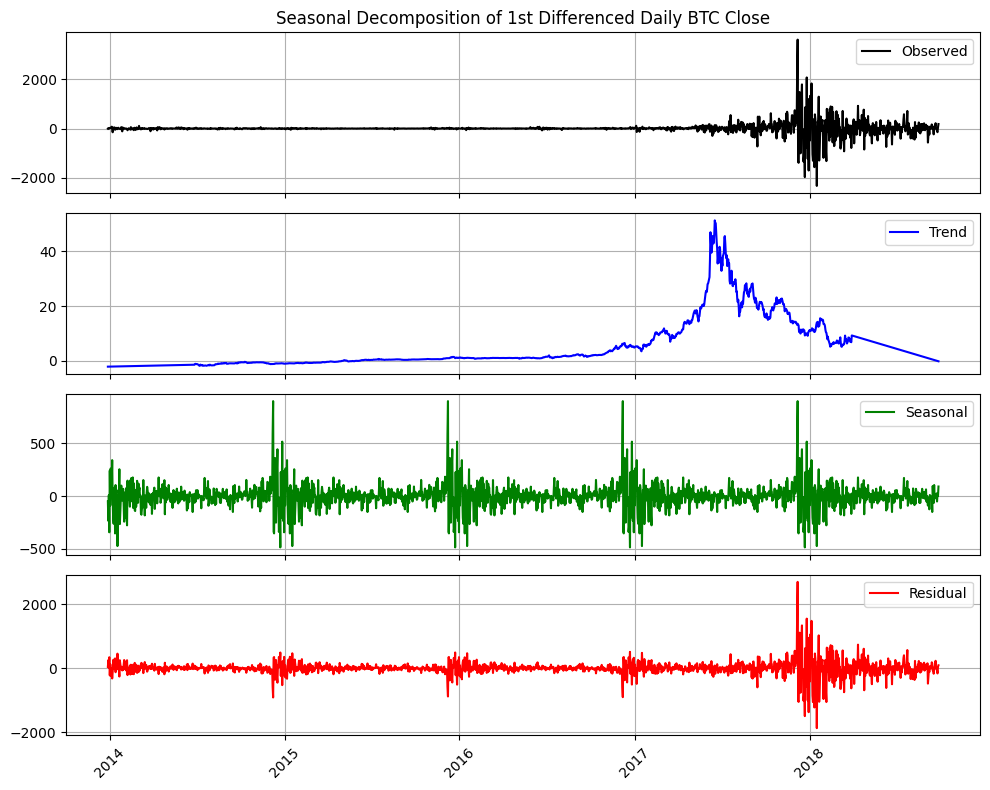

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np


btc_df['daily_close'] = btc_df['Close'].dropna()

# 1st differencing
btc_df['daily_close_1diff']= btc_df['daily_close'].diff() #First differencing for stationarity

# Seasonal decomposition (additive, yearly pattern)
result_1diff = seasonal_decompose(
    btc_df['daily_close_1diff'].dropna(),
    model='additive',
    period=365,
    extrapolate_trend='freq'
)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(btc_df['daily_close_1diff'], color='black', label='Observed')
axes[1].plot(result_1diff.trend, color='blue', label='Trend')
axes[2].plot(result_1diff.seasonal, color='green', label='Seasonal')
axes[3].plot(result_1diff.resid, color='red', label='Residual')

axes[0].set_title('Seasonal Decomposition of 1st Differenced Daily BTC Close')

for ax in axes:
    ax.legend()
    ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
# Run ADF test on 'Close' prices
result_1diff = adfuller(btc_df['daily_close_1diff'].dropna())

# Print results
print('ADF Statistic:', result_1diff[0])
print('p-value:', result_1diff[1])
print('Critical Values:')
for key, value in result_1diff[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -7.287676463792448
p-value: 1.444471830062257e-10
Critical Values:
   1%: -3.434175427574795
   5%: -2.8632297119111967
   10%: -2.567669556525133


Interpretation:

The ADF test checks whether a time series is stationary (no unit root) or non-stationary (has trend or random walk behavior).

Null hypothesis (H₀): Series has a unit root → non-stationary

Alternative hypothesis (H₁): Series is stationary

Now:

Decision Rule:

If ADF Statistic < Critical Value → Reject H₀ → Stationary

If p-value < 0.05 → Reject H₀ → Stationary

Otherwise → Non-stationary

Autocorrelation factor(ACF) and partial autocorrelation factor(PACF) on 1st differencing

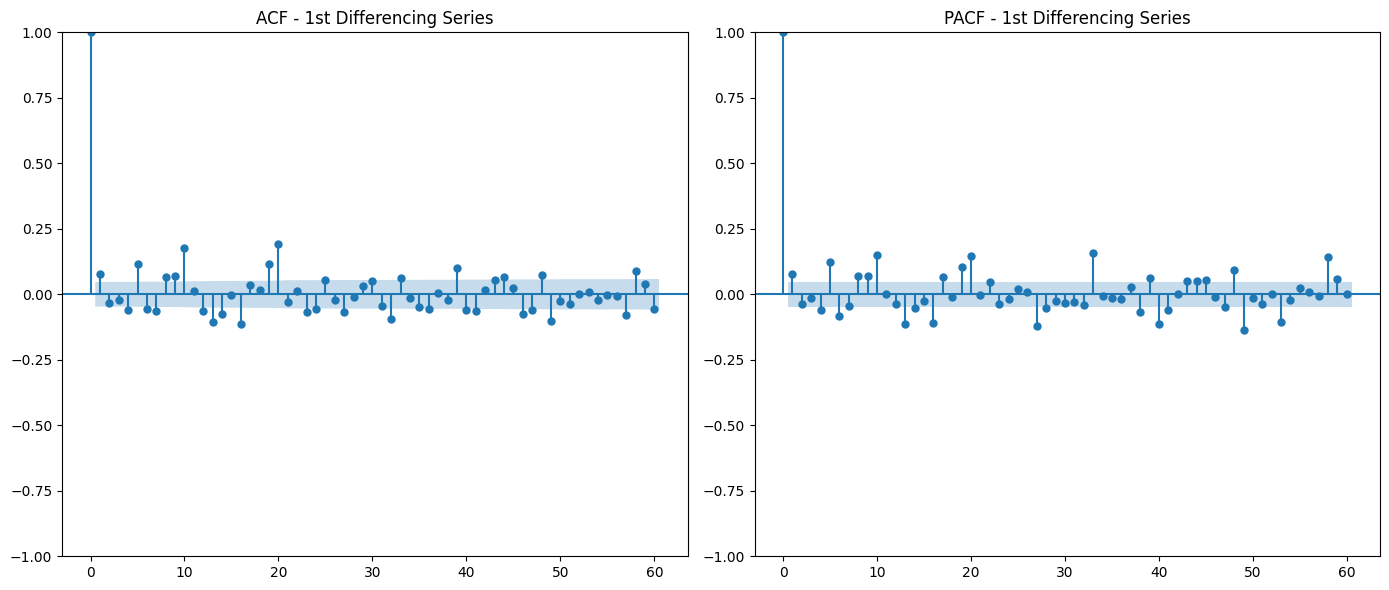

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ACF plot

plot_acf(btc_df['daily_close_1diff'].dropna(), lags=60, ax=axes[0])
axes[0].set_title('ACF - 1st Differencing Series')

# PACF plot
plot_pacf(btc_df['daily_close_1diff'].dropna(), lags=60, ax=axes[1], method='ywm')
axes[1].set_title('PACF - 1st Differencing Series')

plt.tight_layout()
plt.show()

#b. Boxcox Transformation

In [41]:
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller

# Ensure you have a Series
btc_df['close'] = btc_df['Close'].dropna()

# Box-Cox transform (returns transformed series and lambda)
btc_df['close_boxcox'], lambda_ = boxcox(btc_df['close'])

print("Optimal lambda:", lambda_)

# Re-run ADF test on Box-Cox transformed series
adf_result = adfuller(btc_df['close_boxcox'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')


Optimal lambda: -0.42111993775728257
ADF Statistic: -0.07886274399551721
p-value: 0.9515036105213236
   1%: -3.4341465551936534
   5%: -2.863216966926812
   10%: -2.567662770090317


#c. Boxcox Transformation + 1st differencing

The Box-Cox transformation is used to stabilize variance in a time series. Reduces heteroscedasticity (changing variance over time) and can improve model performance for ARIMA-like models.

Differencing is used to make a time series stationary in mean. Transforms a series with a trend into a stationary series, suitable for ARIMA modeling.

In [42]:
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller

# Ensure you have a Series
btc_df['close'] = btc_df['Close'].dropna()

# Box-Cox transform (returns transformed series and lambda)
btc_df['close_boxcox'], lambda_ = boxcox(btc_df['close'])

print("Optimal lambda:", lambda_)

# 1st differencing
btc_df['close_boxcox_1diff'] = btc_df['close_boxcox'].diff().dropna()

# Re-run ADF test on Box-Cox transformed series
adf_result = adfuller(btc_df['close_boxcox_1diff'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')



Optimal lambda: -0.42111993775728257
ADF Statistic: -13.285105346291603
p-value: 7.555848656752787e-25
   1%: -3.4341465551936534
   5%: -2.863216966926812
   10%: -2.567662770090317


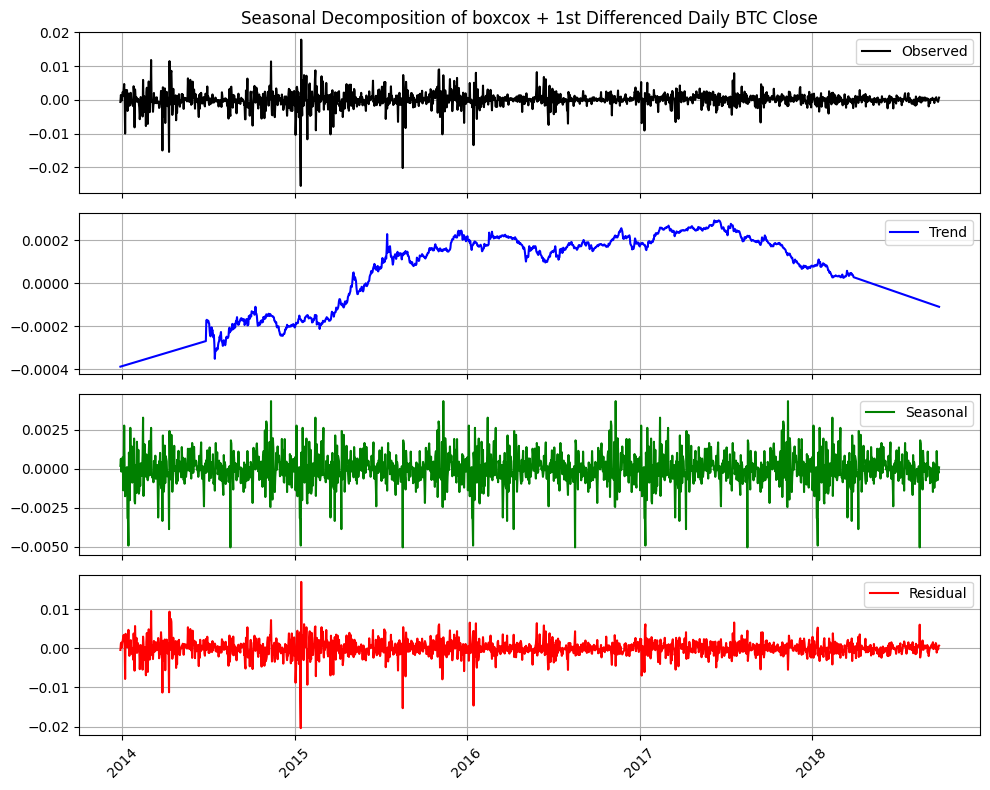

In [43]:

# Seasonal decomposition (additive, yearly pattern)
result_boxcox_1diff = seasonal_decompose(
    btc_df['close_boxcox_1diff'].dropna(),
    model='additive',
    period=365,
    extrapolate_trend='freq'
)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(btc_df['close_boxcox_1diff'], color='black', label='Observed')
axes[1].plot(result_boxcox_1diff.trend, color='blue', label='Trend')
axes[2].plot(result_boxcox_1diff.seasonal, color='green', label='Seasonal')
axes[3].plot(result_boxcox_1diff.resid, color='red', label='Residual')

axes[0].set_title('Seasonal Decomposition of boxcox + 1st Differenced Daily BTC Close')

for ax in axes:
    ax.legend()
    ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This time series is stationalry now.

Autocorrelation factor(ACF) and partial autocorrelation factor(PACF) on boxcox+ 2nd differencing

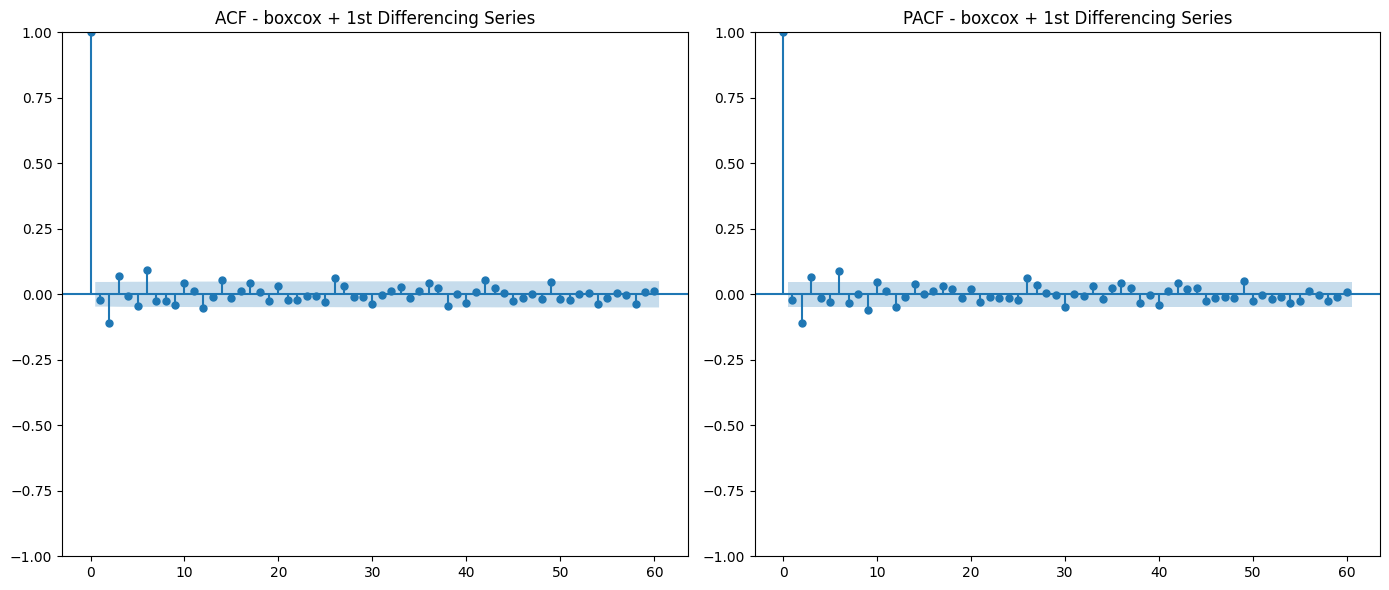

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ACF plot

plot_acf(btc_df['close_boxcox_1diff'].dropna(), lags=60, ax=axes[0])
axes[0].set_title('ACF - boxcox + 1st Differencing Series')

# PACF plot
plot_pacf(btc_df['close_boxcox_1diff'].dropna(), lags=60, ax=axes[1], method='ywm')
axes[1].set_title('PACF - boxcox + 1st Differencing Series')

plt.tight_layout()
plt.show()

#e. Log Transformation

In [45]:

btc_df['close'] = btc_df['Close'].dropna()

# Log transform to stabilize variance
btc_df['close_log'] = np.log(btc_df['close'])

# ADF test
adf_result = adfuller(btc_df['close_log'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: 0.14800649221737575
p-value: 0.9691899482825691
   1%: -3.434137758862471
   5%: -2.8632130839838936
   10%: -2.567660702509265


This time series is still nonstationalry, so we are doing first difference after log transformation.

#f. Log Transformation + 1st differencing

In [46]:
btc_df['close'] = btc_df['Close'].dropna()

# Log transform to stabilize variance
btc_df['close_log'] = np.log(btc_df['close'])
# 1st differencing
btc_df['close_log_1diff'] = btc_df['close_log'].diff()

# ADF test
adf_result = adfuller(btc_df['close_log_1diff'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -16.06142153408702
p-value: 5.633465206509814e-29
   1%: -3.434137758862471
   5%: -2.8632130839838936
   10%: -2.567660702509265


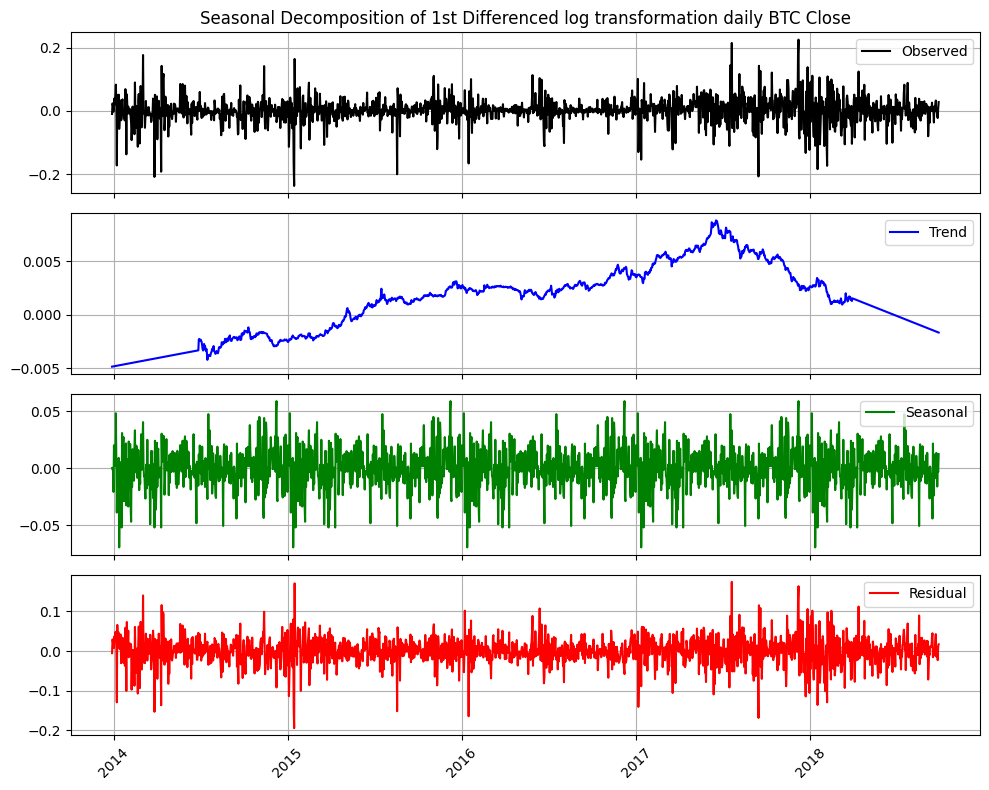

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np


# Seasonal decomposition (additive, yearly pattern)
result_log_1diff = seasonal_decompose(
    btc_df['close_log_1diff'].dropna(),
    model='additive',
    period=365,
    extrapolate_trend='freq'
)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(btc_df['close_log_1diff'], color='black', label='Observed')
axes[1].plot(result_log_1diff.trend, color='blue', label='Trend')
axes[2].plot(result_log_1diff.seasonal, color='green', label='Seasonal')
axes[3].plot(result_log_1diff.resid, color='red', label='Residual')

axes[0].set_title('Seasonal Decomposition of 1st Differenced log transformation daily BTC Close')

for ax in axes:
    ax.legend()
    ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Autocorrelation factor(ACF) and partial autocorrelation factor(PACF) on log+ 1st differencing

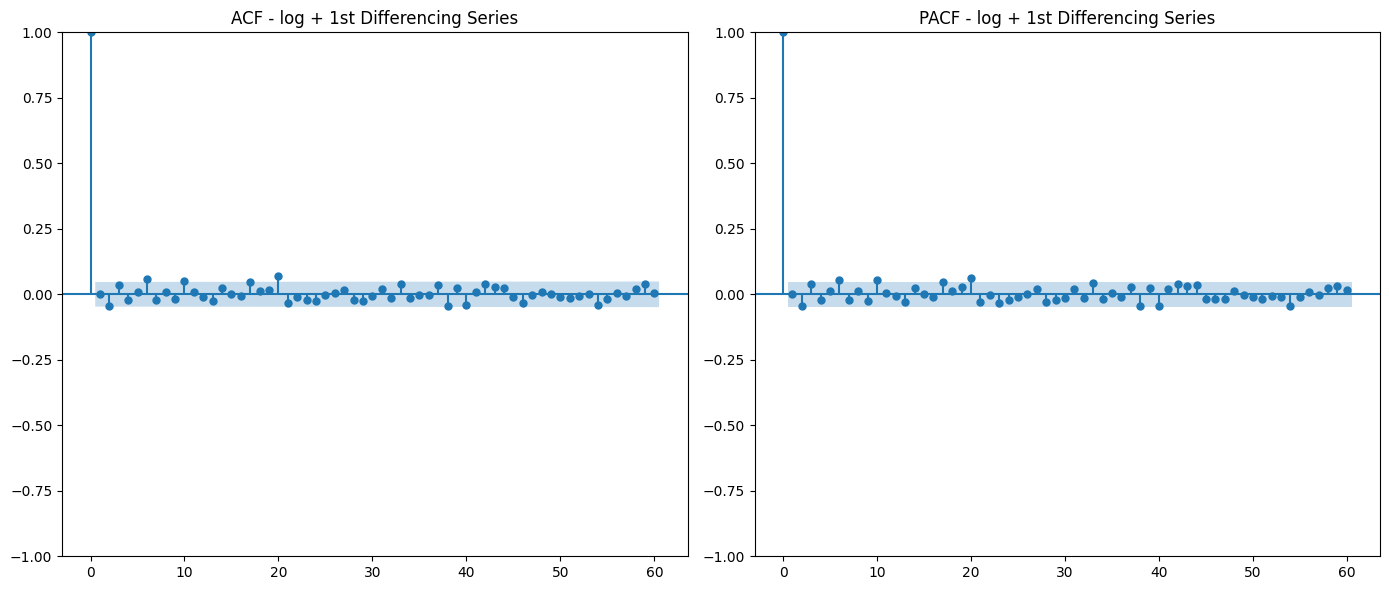

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ACF plot
plot_acf(btc_df['close_log_1diff'].dropna(), lags=60, ax=axes[0])
axes[0].set_title('ACF - log + 1st Differencing Series')

# PACF plot
plot_pacf(btc_df['close_log_1diff'].dropna(), lags=60, ax=axes[1], method='ywm')
axes[1].set_title('PACF - log + 1st Differencing Series')

plt.tight_layout()
plt.show()

#ADF Test Comparison for Stationarity:



| Transformation             | Optimal λ | ADF Statistic | p-value  | 1% Critical Value | 5% Critical Value | 10% Critical Value | Stationary? |
| -------------------------- | --------- | ------------- | -------- | ----------------- | ----------------- | ------------------ | ----------- |
| 1st Differencing           | –         | -7.2877       | 1.44e-10 | -3.4342           | -2.8632           | -2.5677            | Yes         |
| Box-Cox Transformation     | -0.4211   | -0.0789       | 0.9515   | -3.4341           | -2.8632           | -2.5677            | No          |
| Box-Cox + 1st Differencing | -0.4211   | -13.2851      | 7.56e-25 | -3.4341           | -2.8632           | -2.5677            | Yes         |
| Log Transformation         | –         | 0.1480        | 0.9692   | -3.4341           | -2.8632           | -2.5677            | No          |
| Log + 1st Differencing     | –         | -16.0614      | 5.63e-29 | -3.4341           | -2.8632           | -2.5677            | Yes         |


We are selecting the Log + first differencing for model training.

#Monthly forecasting (Log Transformation + 1st differencing)

#ARIMA Model
AutoRegressive Integrated Moving Average
An ARIMA(p, d, q) model combines:

AR(p): autoregressive part — regression on past values

I(d): differencing to make the series stationary

MA(q): moving average part — regression on past forecast errors

For example,

ARIMA(1,1,0) → one AR term, one differencing, no MA

ARIMA(0,1,2) → no AR term, one differencing, two MA terms


#Parameter Selection

I will iteratively explore different combinations of ARIMA parameters. For each combination, I’ll fit a new model using the SARIMAX() function from statsmodels and evaluate its overall performance.

To compare models, I’ll use the Akaike Information Criterion (AIC) — a metric that balances model fit and complexity. The AIC rewards models that fit the data well but penalizes those that are unnecessarily complex. Therefore, the goal is to identify the model with the lowest AIC value, as it represents the best trade-off between goodness of fit and simplicity.

In [49]:
from itertools import product
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# --- 1. Prepare data ---
btc_df = btc_df.sort_index()
start_date = '2014-01-31'
btc_df_daily = btc_df[btc_df.index >= start_date].copy()
btc_df_daily['close_log'] = np.log(btc_df_daily['Close'])

# Split into train/test
split_idx = int(len(btc_df_daily) * 0.8)
train_log = btc_df_daily['close_log'].iloc[:split_idx]
test_log = btc_df_daily['close_log'].iloc[split_idx:]
train_index = train_log.index
test_index = test_log.index

# --- 2. Define ARIMA parameters ---
p_values = range(0, 4)
d_values = [1]  # differencing to make series stationary
q_values = range(0, 4)
parameters = list(product(p_values, d_values, q_values))

# --- 3. Grid search ---
results = []
best_aic = float("inf")
best_model = None
best_param = None

for param in parameters:
    try:
        model = ARIMA(train_log.dropna(), order=param)
        fitted_model = model.fit()
        aic = fitted_model.aic
        results.append((param, aic))

        if aic < best_aic:
            best_aic = aic
            best_model = fitted_model
            best_param = param
    except Exception as e:
        print(f"Model {param} failed: {e}")
        continue

# --- 4. Summary ---
print(f"Best ARIMA parameters: {best_param}")
print(f"Best AIC: {best_aic:.2f}\n")
print(best_model.summary())


Best ARIMA parameters: (3, 1, 2)
Best AIC: -5140.73

                               SARIMAX Results                                
Dep. Variable:              close_log   No. Observations:                 1360
Model:                 ARIMA(3, 1, 2)   Log Likelihood                2576.364
Date:                Sat, 08 Nov 2025   AIC                          -5140.728
Time:                        03:48:45   BIC                          -5109.441
Sample:                    01-31-2014   HQIC                         -5129.015
                         - 10-21-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4571      0.145    -10.031      0.000      -1.742      -1.172
ar.L2         -0.7531      0.115     -6.536      0.000      -0.979      -0.527

In [50]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

   parameters          aic
14  (3, 1, 2) -5140.727998
12  (3, 1, 0) -5140.293681
10  (2, 1, 2) -5139.737160
3   (0, 1, 3) -5139.599015
8   (2, 1, 0) -5139.573120


✅ Key point:

(3,1,2) is your best ARIMA model for the log 1-differenced series.

d=1 because differencing was applied by the model.

we can now use this model to forecast, then reconstruct the original prices by cumulative sum + last log value, and finally exponentiate to invert the log.

Although the AIC (Akaike Information Criterion) is usually positive, it can sometimes appear as a negative value. This happens because the AIC is based on the model’s log-likelihood, which can be shifted by an arbitrary additive constant. Therefore, the absolute value of the AIC has no intrinsic meaning.

What truly matters are the relative differences in AIC values among competing models. The model with the lowest AIC is considered the best, as it provides the optimal balance between goodness of fit and model complexity.

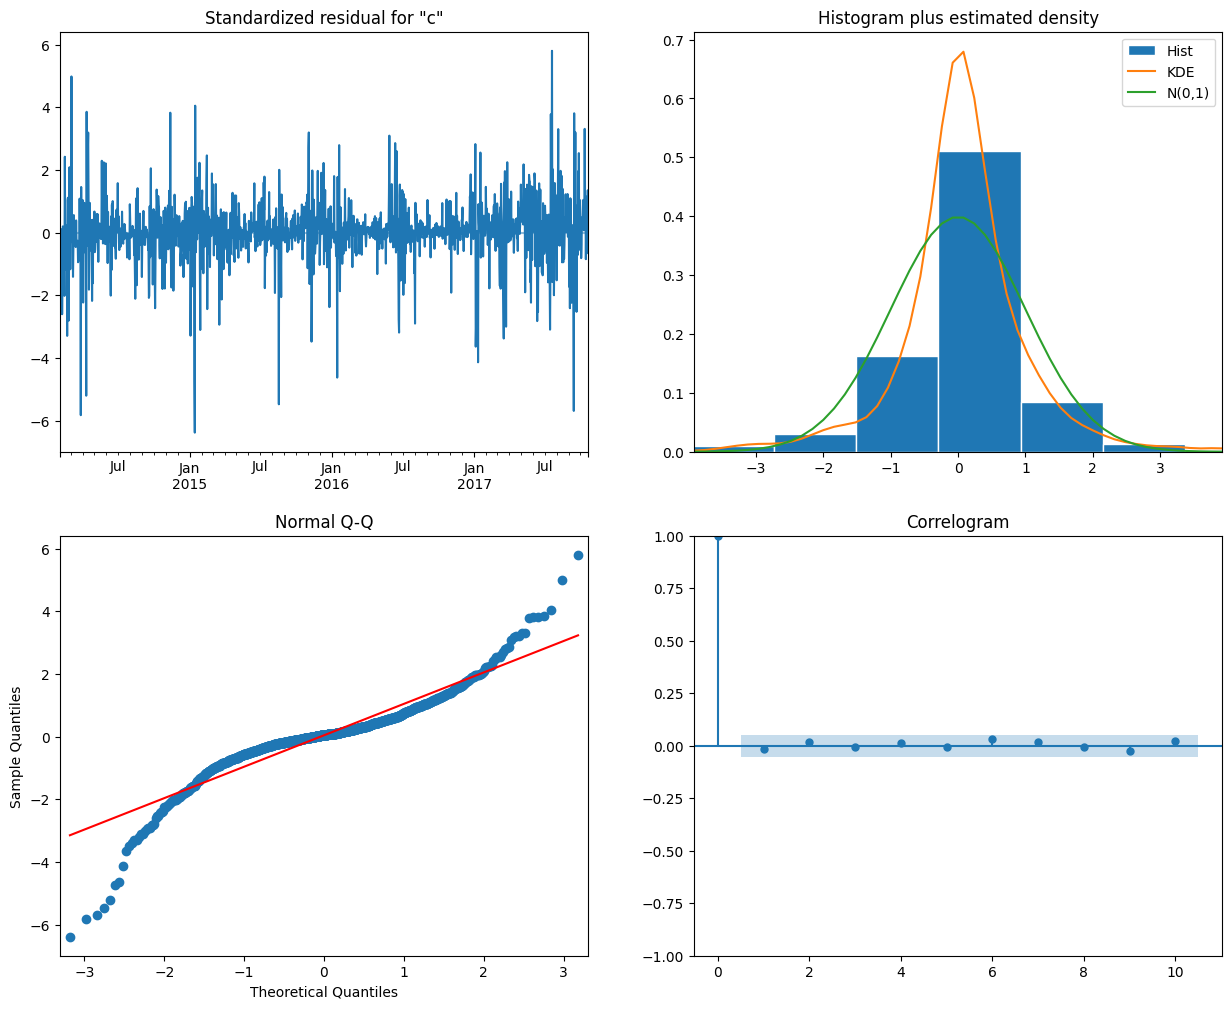

In [51]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Interpretations:

----
1. Standardized Residuals Plot (Top Left): it shows Residuals (model errors) over time after standardization (mean ≈ 0, variance ≈ 1). Residuals is centered around zero — no clear upward or downward trend. Variance is constant over time (no “fanning out” or clustering of volatility).
No visible pattern → good.

Red flags:
Trend or cyclical structure → model didn’t capture all patterns.
Increasing or decreasing variance → heteroskedasticity problem.

----

2. Histogram plus KDE (Top Right): it shows Distribution of residuals, with a red KDE curve (estimated density) and a blue Normal(0,1) curve overlay. The red KDE line should closely follow the blue normal curve.
The histogram should be roughly symmetric and bell-shaped → residuals are normally distributed.

Red flags:
Skewed or heavy-tailed histogram → residuals not normal.
Peaks or multi-modal shape → non-linear patterns still exist.

----

3. Normal Q–Q Plot (Bottom Left): it shows Plots residual quantiles vs. theoretical normal quantiles. Points are lying close to the diagonal 45° line.
That means residuals are approximately normally distributed.

Red flags:
Curved or S-shaped pattern → skewness or heavy tails.
Outliers far from the line → abnormal error values.

----
4. Correlogram / ACF of Residuals (Bottom Right): it shows Autocorrelation of residuals at different lags (same as ACF plot but for residuals). Most spikes within the blue confidence band → residuals are uncorrelated (white noise).
The model has captured all time-dependent structure.

Red flags:
Significant spikes outside the band → residual autocorrelation → model can be improved (wrong p/q or seasonal order).



#Predictions for ARIMA Model (3,1,2)

Rolling Forecast RMSE: 561.9003
Rolling Forecast MAE: 349.5649
R² score: 0.9642


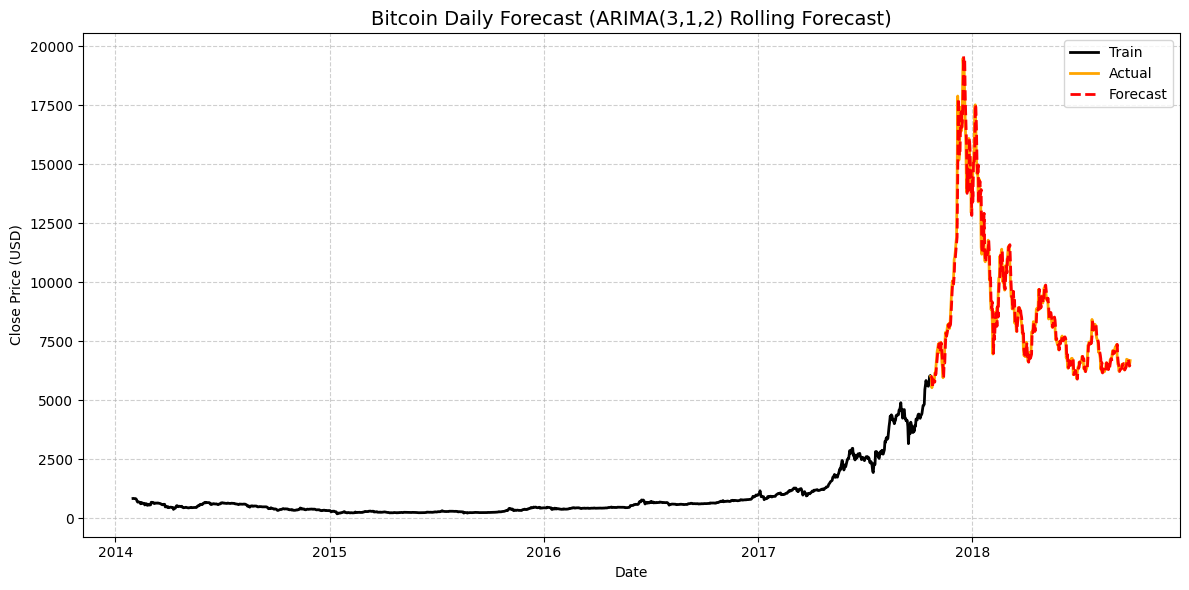

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# --- 2. Rolling Forecast ---
history = list(train_log)
predictions_log = []

for t in range(len(test_log)):
    model = ARIMA(history, order=(3,1,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions_log.append(yhat)
    history.append(test_log.iloc[t])

# Convert predictions back to actual scale
forecast_actual = np.exp(predictions_log)
test_actual = np.exp(test_log)

# --- 3. Evaluate Forecast ---
rmse = np.sqrt(mean_squared_error(test_actual, forecast_actual))
mae = mean_absolute_error(test_actual, forecast_actual)
print(f"Rolling Forecast RMSE: {rmse:.4f}")
print(f"Rolling Forecast MAE: {mae:.4f}")
r2 = r2_score(test_actual, forecast_actual)
print(f"R² score: {r2:.4f}")

# --- 4. Plot Forecast ---
plt.figure(figsize=(12,6))
plt.plot(train_index, np.exp(train_log), label='Train', color='black', linewidth=2)
plt.plot(test_index, test_actual, label='Actual', color='orange', linewidth=2)
plt.plot(test_index, forecast_actual, label='Forecast', color='red', linestyle='--', linewidth=2)
plt.title("Bitcoin Daily Forecast (ARIMA(3,1,2) Rolling Forecast)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


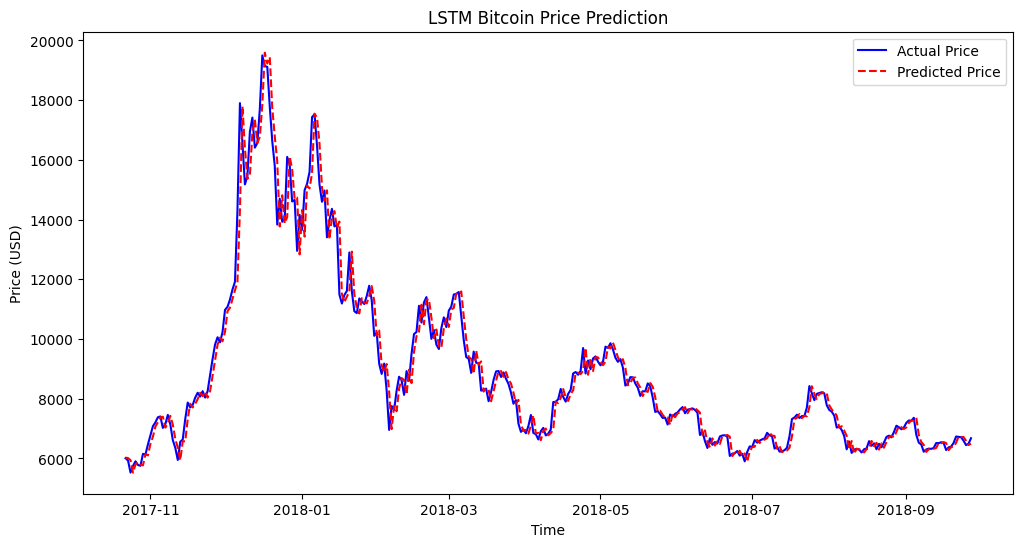

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(test_index,test_actual, label='Actual Price', color='blue')
plt.plot(test_index,forecast_actual, label='Predicted Price', color='red', linestyle='--')
plt.title("LSTM Bitcoin Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

#Modelling using Neural Network (LSTM)

In [114]:
df_BTC = df.loc[df['Symbol'] == 'BTC',['Close']]
df_BTC.shape

(1736, 1)

In [115]:
# --- 1. Prepare data ---
df_BTC = df_BTC.sort_index()
start_date = '2014-01-31'
df_BTC_daily = df_BTC[df_BTC.index >= start_date].copy()

df_BTC_daily['close_log'] = np.log(df_BTC_daily['Close'])



In [116]:
# Split into train/test
split_idx = int(len(df_BTC_daily) * 0.8)
train_log = df_BTC_daily['close_log'].iloc[:split_idx]
test_log = df_BTC_daily['close_log'].iloc[split_idx:]
#train_index = train_log.index
#test_index = test_log.index

In [117]:
from sklearn.preprocessing import MinMaxScaler
# --- 3. Scale data ---
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_log = scaler.fit_transform(train_log.values.reshape(-1,1))
scaled_test_log = scaler.transform(test_log.values.reshape(-1,1))

In [118]:
# creating input/output sequences (sliding window)
def create_dataset(dataset, look_back=60):
    x, y = [], []
    for i in range(look_back, len(dataset)):
        x.append(dataset[i - look_back:i, 0]) #past 60 days
        y.append(dataset[i, 0])  #next days price
    return np.array(x), np.array(y)

look_back = 60
x_train, y_train = create_dataset(scaled_train_log, look_back)
x_test, y_test = create_dataset(scaled_test_log, look_back)

In [119]:
x_train.shape

(1300, 60)

In [120]:
y_train.shape

(1300,)

In [121]:
x_test.shape

(281, 60)

In [122]:
y_test.shape

(281,)

Reshape for LSTM input

In [123]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [64]:
x_train

array([[[0.43691072],
        [0.43781919],
        [0.43535   ],
        ...,
        [0.28799644],
        [0.26954975],
        [0.26752561]],

       [[0.43781919],
        [0.43535   ],
        [0.4348198 ],
        ...,
        [0.26954975],
        [0.26752561],
        [0.28050588]],

       [[0.43535   ],
        [0.4348198 ],
        [0.43623946],
        ...,
        [0.26752561],
        [0.28050588],
        [0.25491216]],

       ...,

       [[0.88955338],
        [0.88352247],
        [0.89044513],
        ...,
        [0.98521849],
        [0.97920117],
        [0.9784496 ]],

       [[0.88352247],
        [0.89044513],
        [0.89395429],
        ...,
        [0.97920117],
        [0.9784496 ],
        [0.98437084]],

       [[0.89044513],
        [0.89395429],
        [0.90621099],
        ...,
        [0.9784496 ],
        [0.98437084],
        [0.99904999]]])

#Modelling using LSTM

Single Layer LSTM

In [126]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM,GRU,BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [127]:
model = Sequential()

model.add(LSTM(
    units=128,
    return_sequences=False,
    input_shape=(x_train.shape[1], 1),

))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [129]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100, batch_size=32, verbose=1,callbacks=[early_stopping])

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 0.0481 - val_loss: 0.0025
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 5.9435e-04 - val_loss: 0.0035
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 4.5377e-04 - val_loss: 0.0015
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 3.9726e-04 - val_loss: 0.0016
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 3.9084e-04 - val_loss: 7.2601e-04
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.8527e-04 - val_loss: 0.0029
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 3.9300e-04 - val_loss: 0.0015
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 3.5067e-04 - val_loss: 0.0020
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 3.6609e-04 - val_loss: 0.0011
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 3.4629e-04 - val_loss: 0.0014
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 3.6017e-04 - val_loss: 8.1204e-04
Epo

Text(0.5, 1.0, 'Training and Validation Loss')

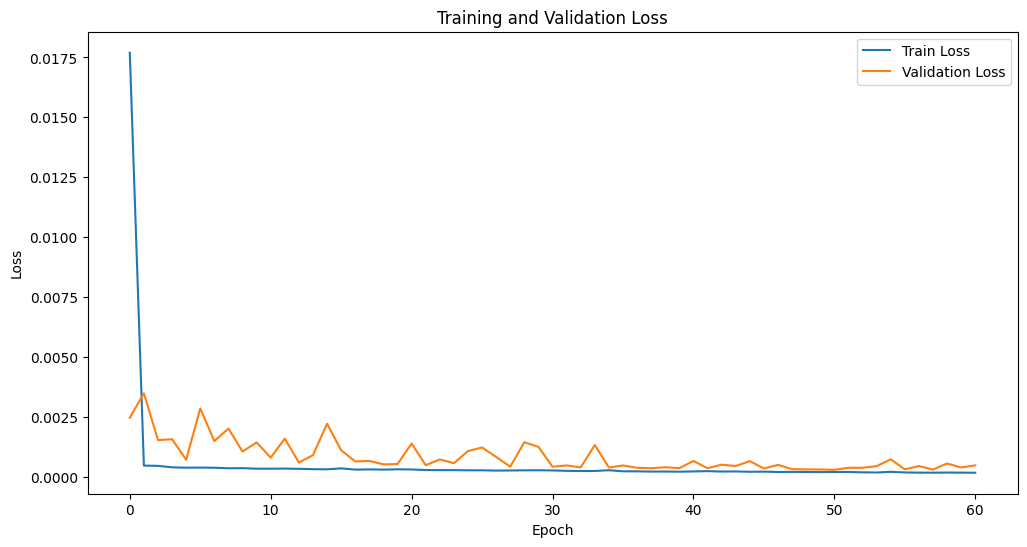

In [130]:
#Plotting valid loss
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

In [131]:
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [132]:
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
closing_price_orig = np.exp(closing_price)
y_test_orig = np.exp(y_test_original)

In [133]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_orig, closing_price_orig))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 812.88


In [134]:
r2 = r2_score(y_test_orig, closing_price_orig)
print(f"R² score: {r2:.4f}")

R² score: 0.8942


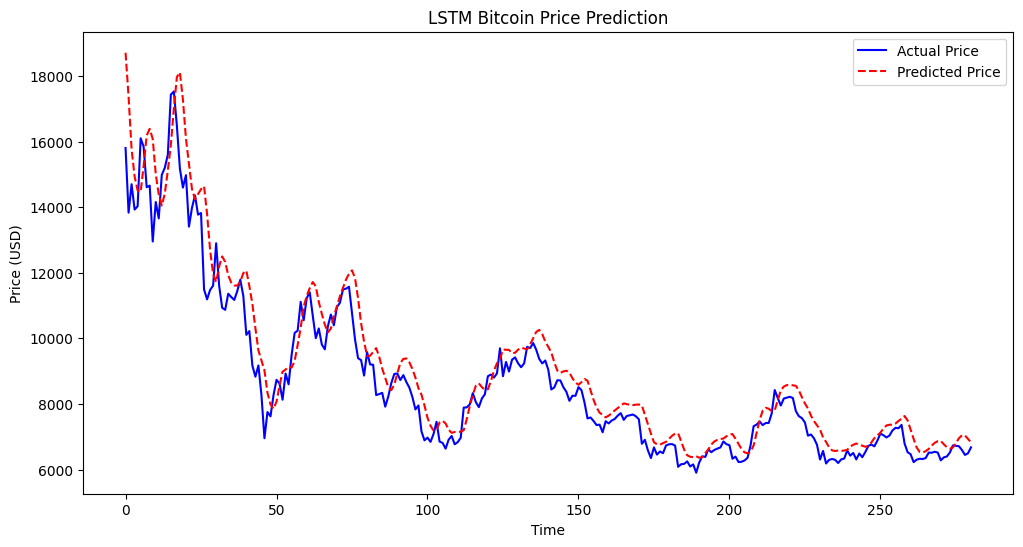

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_orig, label='Actual Price', color='blue')
plt.plot(closing_price_orig, label='Predicted Price', color='red', linestyle='--')
plt.title("LSTM Bitcoin Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

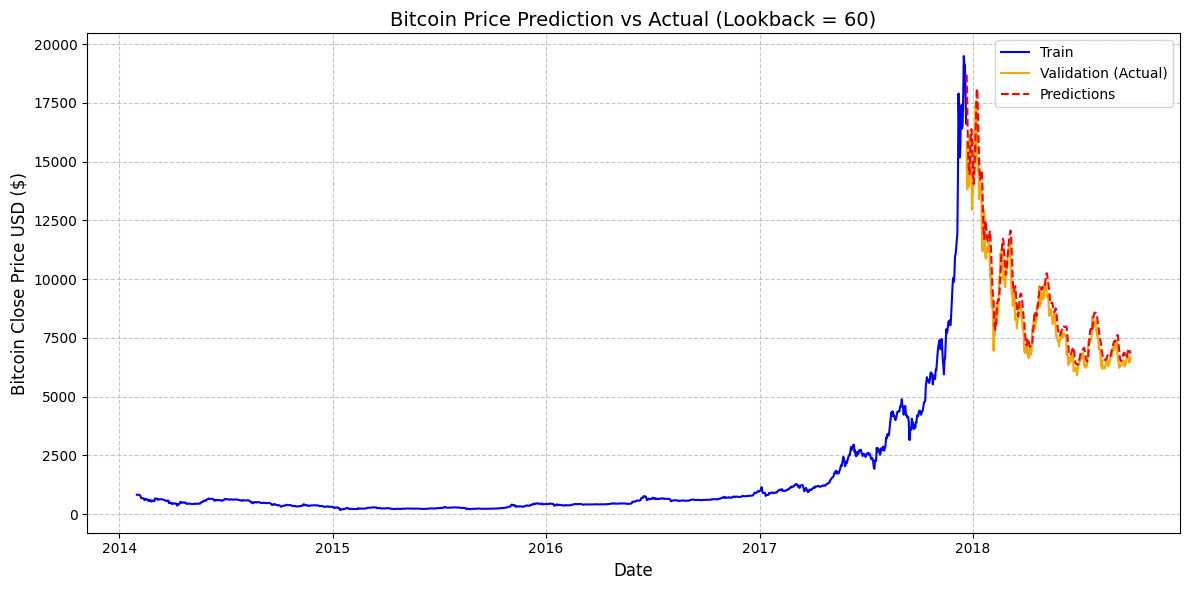

In [136]:
lookback = 60  # number of past days used for each prediction

# Define split point (e.g., 80% for training)
split_index = int(len(df_BTC_daily) * 0.8)

# Split into training and validation
train = df_BTC_daily.iloc[:split_index].copy()
valid = df_BTC_daily.iloc[split_index:].copy()

# The predictions correspond to the validation data AFTER the lookback window
valid = valid.iloc[lookback:].copy()  # shift to match prediction output length

# Assign predictions (ensure same length)
valid['Predictions'] = closing_price_orig.flatten()[:len(valid)]

# Plot results
plt.figure(figsize=(12,6))
plt.plot(df_BTC_daily.iloc[:split_index + lookback]['Close'], label='Train', color='blue')
plt.plot(df_BTC_daily.iloc[split_index + lookback:]['Close'], label='Validation (Actual)', color='orange')
plt.plot(valid['Predictions'], label='Predictions', color='red', linestyle='--')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Bitcoin Close Price USD ($)', fontsize=12)
plt.title(f'Bitcoin Price Prediction vs Actual (Lookback = {lookback})', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Single LAyer GRU

In [137]:
model_GRU = Sequential()

# First GRU layer with recurrent dropout
model_GRU.add(GRU(
    units=128,
    return_sequences=False,
    input_shape=(x_train.shape[1], 1),

))
# Output layer
model_GRU.add(Dense(1))

In [138]:
model_GRU.compile(loss='mean_squared_error', optimizer='adam')

In [139]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

model_GRU.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100, batch_size=32, verbose=1,callbacks=[early_stopping])

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0371 - val_loss: 4.2212e-04
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 3.6972e-04 - val_loss: 7.4169e-04
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 2.2761e-04 - val_loss: 4.5630e-04
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 2.1235e-04 - val_loss: 5.1835e-04
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 2.2725e-04 - val_loss: 3.7211e-04
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 1.9216e-04 - val_loss: 5.7696e-04
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 1.8487e-04 - val_loss: 4.9901e-04
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 2.0623e-04 - val_loss: 5.5735e-04
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.5246e-04 - val_loss: 4.9920e-04
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 1.7536e-04 - val_loss: 3.3214e-04
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 1

Text(0.5, 1.0, 'Training and Validation Loss')

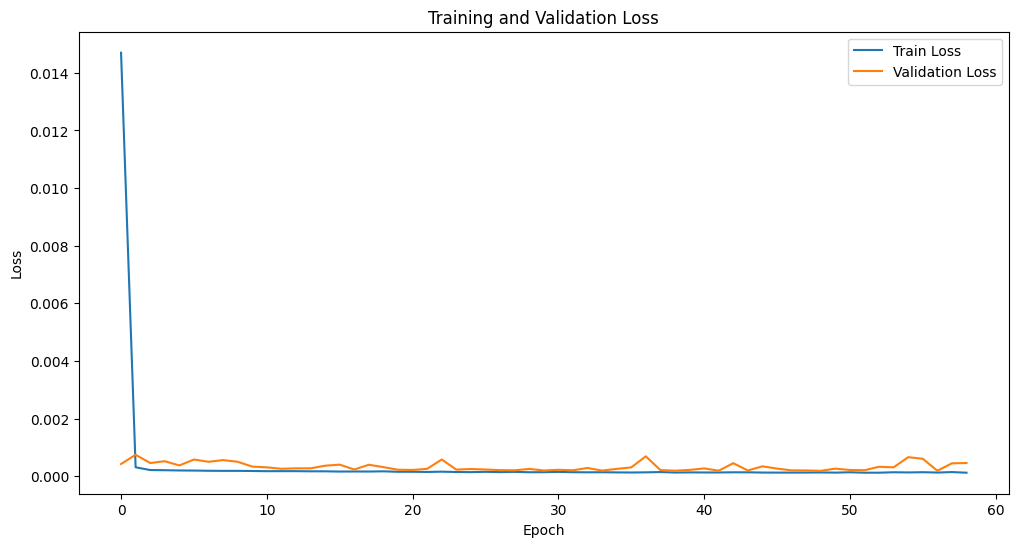

In [140]:
#Plotting valid loss
plt.figure(figsize=(12,6))
plt.plot(model_GRU.history.history['loss'], label='Train Loss')
plt.plot(model_GRU.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

In [141]:
closing_price_GRU = model_GRU.predict(x_test)
closing_price_GRU = scaler.inverse_transform(closing_price_GRU)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [142]:
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
closing_price_orig_GRU = np.exp(closing_price_GRU)
y_test_orig = np.exp(y_test_original)


In [143]:
rmse = np.sqrt(mean_squared_error(y_test_orig, closing_price_orig_GRU))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
r2 = r2_score(y_test_orig, closing_price_orig_GRU)
print(f"R² score: {r2:.4f}")

Root Mean Squared Error (RMSE): 771.08
R² score: 0.9048


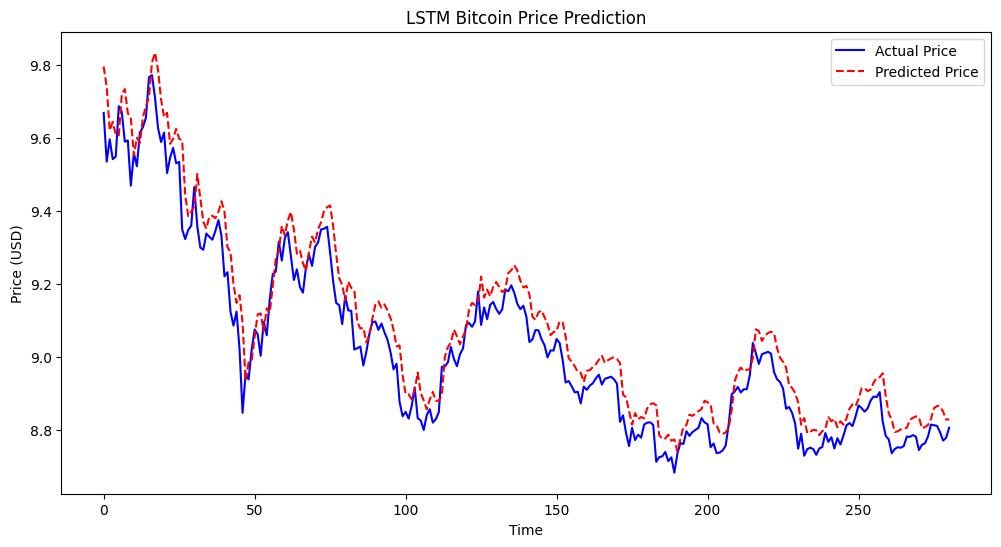

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_original, label='Actual Price', color='blue')
plt.plot(closing_price_GRU, label='Predicted Price', color='red', linestyle='--')

plt.title("LSTM Bitcoin Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Stacked Layer LSTM + Dropout

In [167]:
model = Sequential()

model.add(LSTM(
    units=128,
    return_sequences=True,
    input_shape=(x_train.shape[1], 1),
    #recurrent_dropout=0.2
))
model.add(Dropout(0.2))

model.add(LSTM(
    units=64,
    #recurrent_dropout=0.2
))
model.add(Dropout(0.2))

model.add(Dense(1))

In [168]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100, batch_size=32, verbose=1,callbacks=[early_stopping])

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 0.0382 - val_loss: 9.9959e-04
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0016 - val_loss: 8.5085e-04
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0021 - val_loss: 8.1891e-04
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0016 - val_loss: 8.6825e-04
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0012 - val_loss: 8.5275e-04
Epoch 12/100
41/41 ━

Text(0.5, 1.0, 'Training and Validation Loss')

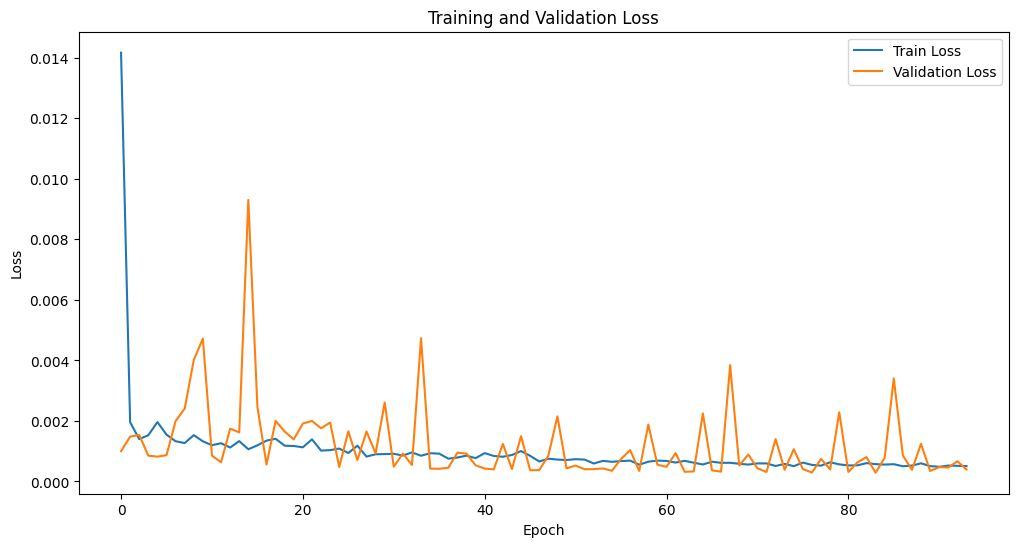

In [169]:
#Plotting valid loss
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

In [170]:
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
closing_price_orig = np.exp(closing_price)
y_test_orig = np.exp(y_test_original)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


In [171]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_orig, closing_price_orig))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test_orig, closing_price_orig)
print(f"R² score: {r2:.4f}")

Root Mean Squared Error (RMSE): 722.26
R² score: 0.9165


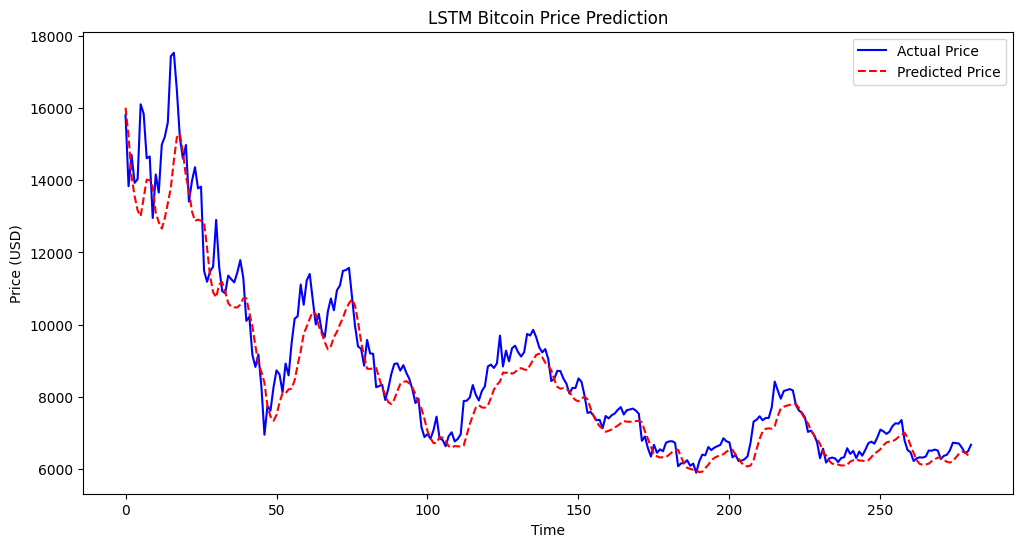

In [172]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_orig, label='Actual Price', color='blue')
plt.plot(closing_price_orig, label='Predicted Price', color='red', linestyle='--')
plt.title("LSTM Bitcoin Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

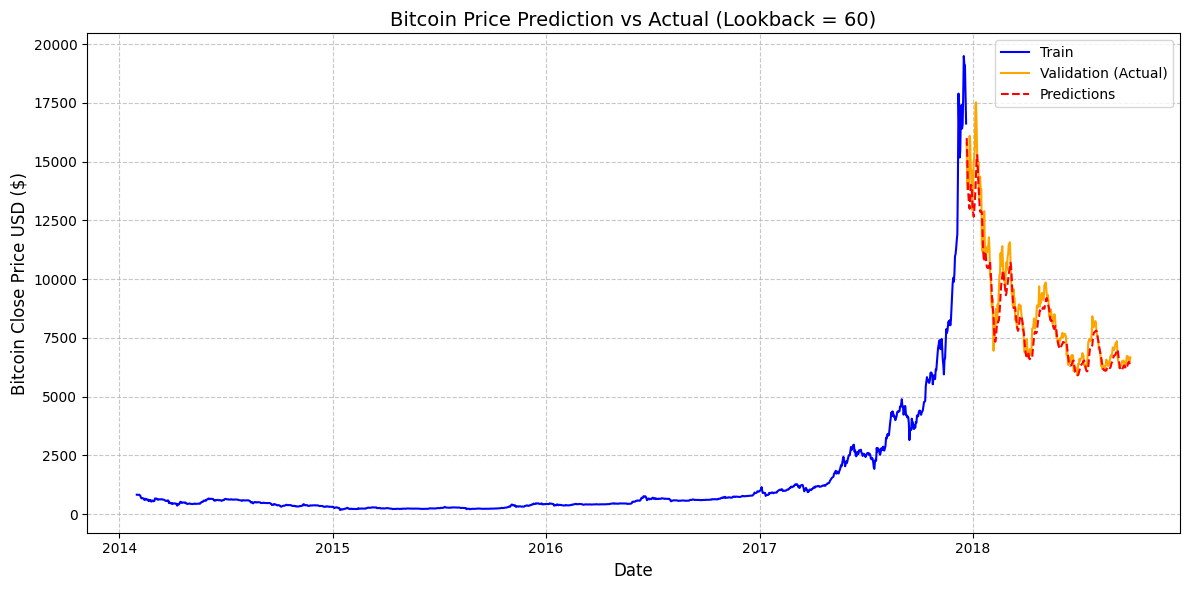

In [173]:
lookback = 60  # number of past days used for each prediction

# Define split point (e.g., 80% for training)
split_index = int(len(df_BTC_daily) * 0.8)

# Split into training and validation
train = df_BTC_daily.iloc[:split_index].copy()
valid = df_BTC_daily.iloc[split_index:].copy()

# The predictions correspond to the validation data AFTER the lookback window
valid = valid.iloc[lookback:].copy()  # shift to match prediction output length

# Assign predictions (ensure same length)
valid['Predictions'] = closing_price_orig.flatten()[:len(valid)]

# Plot results
plt.figure(figsize=(12,6))
plt.plot(df_BTC_daily.iloc[:split_index + lookback]['Close'], label='Train', color='blue')
plt.plot(df_BTC_daily.iloc[split_index + lookback:]['Close'], label='Validation (Actual)', color='orange')
plt.plot(valid['Predictions'], label='Predictions', color='red', linestyle='--')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Bitcoin Close Price USD ($)', fontsize=12)
plt.title(f'Bitcoin Price Prediction vs Actual (Lookback = {lookback})', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Stacked Layer GRU + Dropout

In [185]:
model_GRU = Sequential()

# First GRU layer with recurrent dropout
model_GRU.add(GRU(
    units=128,
    return_sequences=True,
    input_shape=(x_train.shape[1], 1),

))
model_GRU.add(Dropout(0.2))  # regular dropout on inputs


model_GRU.add(GRU(
    units=64,
))
model_GRU.add(Dropout(0.2))  # regular dropout on inputs

# Output layer
model_GRU.add(Dense(1))


In [186]:
model_GRU.compile(loss='mean_squared_error', optimizer='adam')

In [187]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

model_GRU.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100, batch_size=32, verbose=1,callbacks=[early_stopping])

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 0.0326 - val_loss: 7.1344e-04
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0024 - val_loss: 4.8705e-04
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0015 - val_loss: 4.2530e-04
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0013 - val_loss: 3.5241e-04
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0012 - val_loss: 6.8445e-04
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - loss: 0.0013 - val_loss: 4.4487e-04
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - loss: 0.0012 - val_loss: 3.8319e-04
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - loss: 0.0010 - val_loss: 7.4819e-04
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - loss: 0.0011 - val_loss: 3.3250e-04
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - loss: 0.0012 - val_loss: 4.4527e-04

Text(0.5, 1.0, 'Training and Validation Loss')

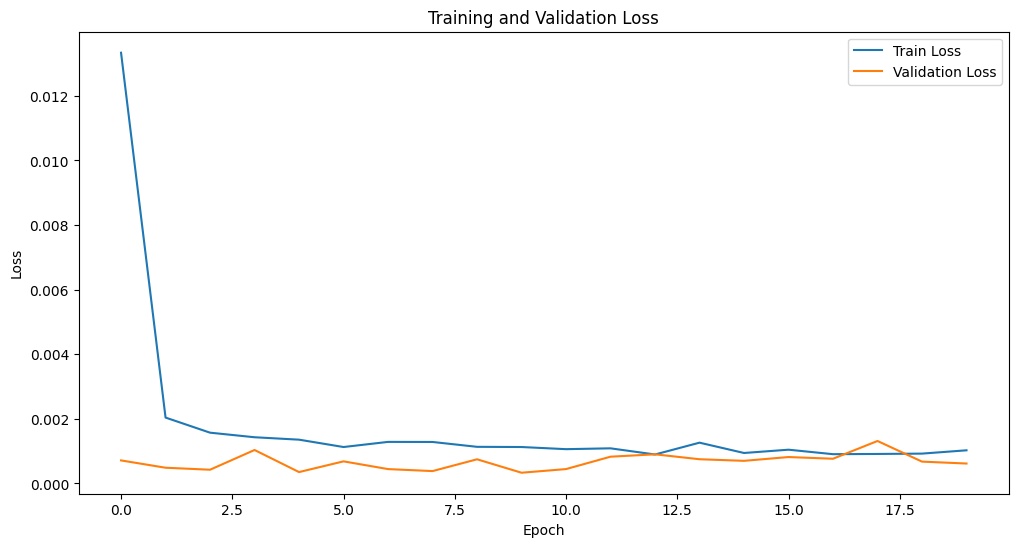

In [188]:
#Plotting valid loss
plt.figure(figsize=(12,6))
plt.plot(model_GRU.history.history['loss'], label='Train Loss')
plt.plot(model_GRU.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

In [189]:
closing_price_GRU = model_GRU.predict(x_test)
closing_price_GRU = scaler.inverse_transform(closing_price_GRU)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step


In [190]:
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

In [191]:
closing_price_orig_GRU = np.exp(closing_price_GRU)
y_test_orig = np.exp(y_test_original)

In [192]:
rmse = np.sqrt(mean_squared_error(y_test_orig, closing_price_orig_GRU))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 831.69


In [193]:
r2 = r2_score(y_test_orig, closing_price_orig_GRU)
print(f"R² score: {r2:.4f}")

R² score: 0.8893


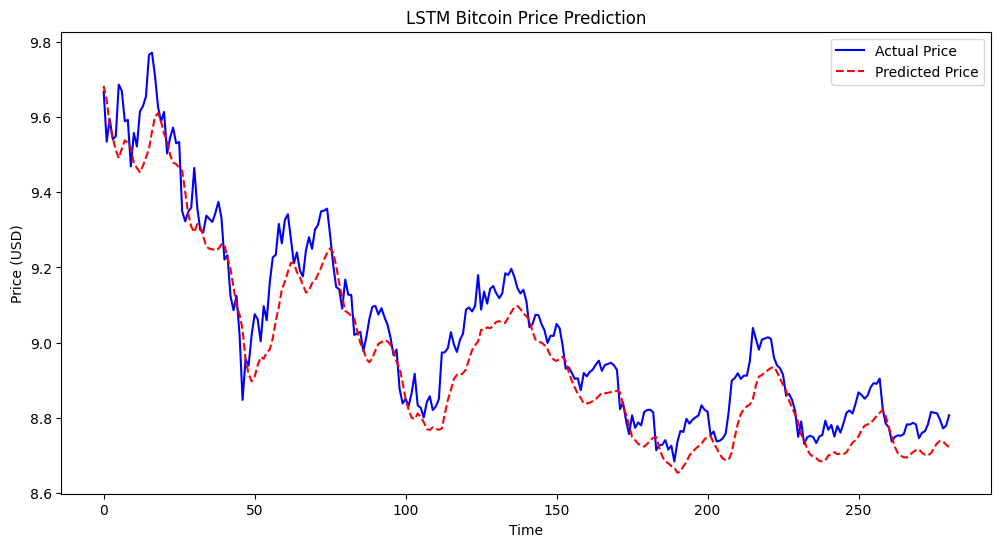

In [194]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_original, label='Actual Price', color='blue')
plt.plot(closing_price_GRU, label='Predicted Price', color='red', linestyle='--')

plt.title("LSTM Bitcoin Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

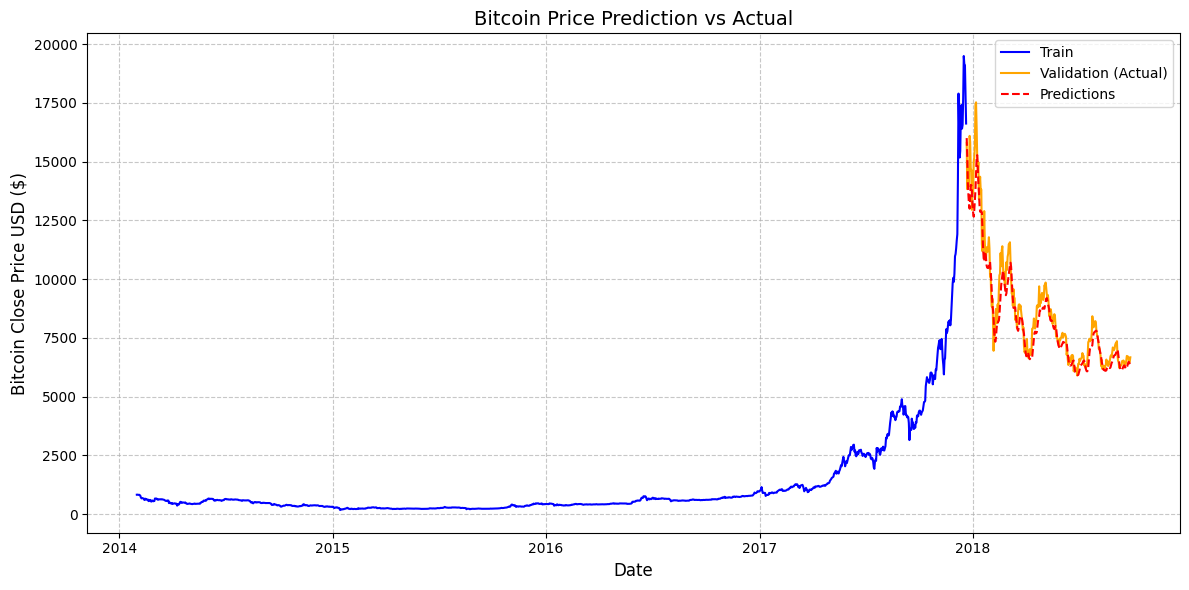

In [195]:
import matplotlib.dates as mdates

# Ensure 'closing_price' aligns with validation data


# Align valid DataFrame with predictions
valid_aligned = valid.iloc[-len(closing_price_orig_GRU):].copy()
valid_aligned['Predictions'] = closing_price_orig_GRU.flatten()


# Plot
plt.figure(figsize=(12,6))
plt.legend()

plt.plot(df_BTC_daily.iloc[:split_index + lookback]['Close'], label='Train', color='blue')
plt.plot(df_BTC_daily.iloc[split_index + lookback:]['Close'], label='Validation (Actual)', color='orange')
plt.plot(valid['Predictions'], label='Predictions', color='red', linestyle='--')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Bitcoin Close Price USD ($)', fontsize=12)
plt.title('Bitcoin Price Prediction vs Actual', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#Final Comparison Table for statistics and Neural network models

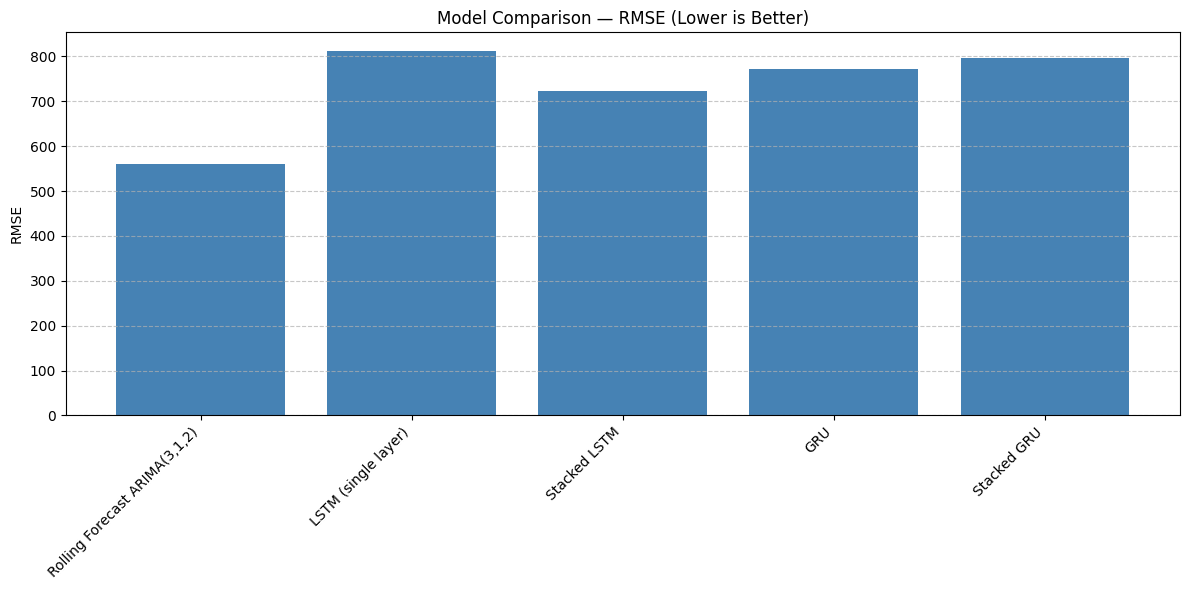

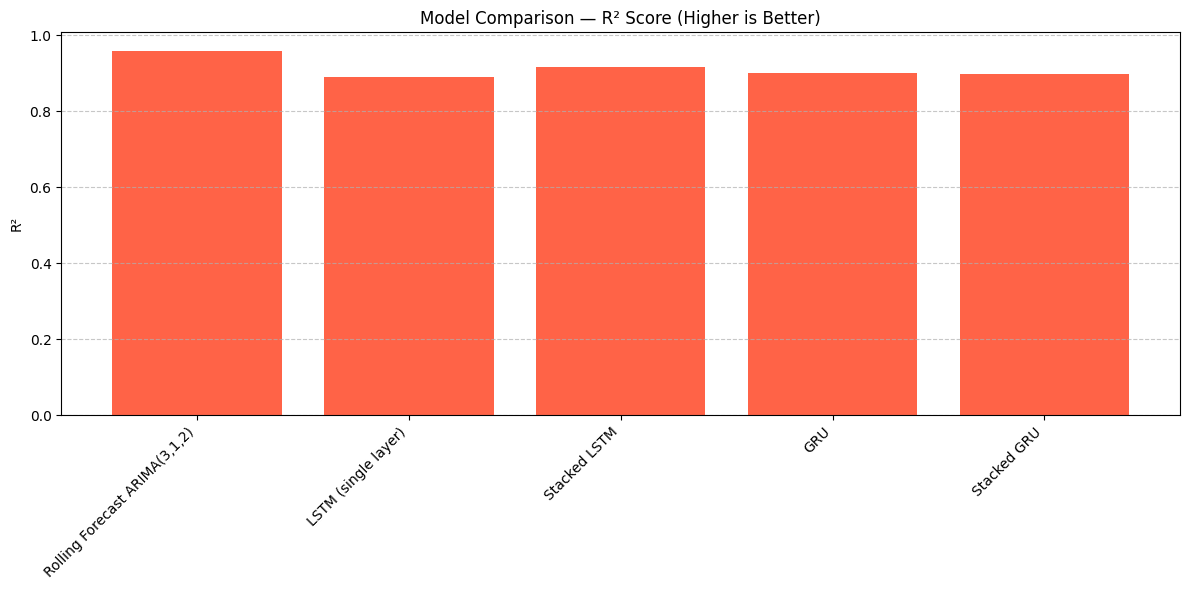

In [198]:
data = {
    "Model": [
        "Rolling Forecast ARIMA(3,1,2)",
        "LSTM (single layer)",
        "Stacked LSTM",
        "GRU",
        "Stacked GRU"
    ],
    "RMSE": [561, 813, 722, 771,796],
    "R2": [0.96, 0.89, 0.916, 0.90, 0.898]
}

df_results = pd.DataFrame(data)

# --- Plot 1: RMSE Comparison ---
plt.figure(figsize=(12,6))
plt.bar(df_results["Model"], df_results["RMSE"], color='steelblue')
plt.title("Model Comparison — RMSE (Lower is Better)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("RMSE")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot 2: R² Comparison ---
plt.figure(figsize=(12,6))
plt.bar(df_results["Model"], df_results["R2"], color='tomato')
plt.title("Model Comparison — R² Score (Higher is Better)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("R²")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()